<a href="https://colab.research.google.com/github/marshux/DictionaryAttackProgram/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This project aims to observe the correlation between the daily intake of different nutrients and diseases and life expectancies around the world. The four diseases we chose to predict for are diabetes 1, diabetes 2, ischemic heart disease, and rheumatic heart disease. We will use Random Forest Regressor, XGB, and Ordinary Least Squares Regression to do our data modeling and make our predictions. We will also compare the results of these models to see which had the highest performance.



# **0** Libraries and Setup Jargon

In [1]:
!pip install pandasql
!pip install pandas 
import pandas as pd
import datetime as dt
import re
import pandasql as ps
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=99da5542d696976f1748b0069db196f4bac7f28abb90320e7a2831c94b747ad5
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1** Data Loading and Preprocessing


We have three data sources that we will be using for this project. We have life expectancy data, disease data (diabetes and heart disease), and lastly nutrition data. All of these data sets have country codes and years, which is primarily how we will be combining them. In ths section we load all the data and create the combined dataframes that we will use to do our EDA and data modelling. 

## **1.1** Loading Individual CSVs

Here we load in data: daily intake of certain nutrients, life expectancy in countries over time, and dseases in countries over time. 

In [3]:
#nutrient data

sugar_sweet_beverage = pd.read_csv('/content/drive/MyDrive/CIS545 Project/v15_cnty.csv')
coffee = pd.read_csv('/content/drive/MyDrive/CIS545 Project/v17_cnty.csv')
tea = pd.read_csv('/content/drive/MyDrive/CIS545 Project/v18_cnty.csv')
carbs = pd.read_csv('/content/drive/MyDrive/CIS545 Project/v22_cnty.csv')
protein = pd.read_csv('/content/drive/MyDrive/CIS545 Project/v23_cnty.csv')
saturated_fat = pd.read_csv('/content/drive/MyDrive/CIS545 Project/v27_cnty.csv')
monosat_fat = pd.read_csv('/content/drive/MyDrive/CIS545 Project/v28_cnty.csv')
fiber = pd.read_csv('/content/drive/MyDrive/CIS545 Project/v34_cnty.csv')
calcium = pd.read_csv('/content/drive/MyDrive/CIS545 Project/v36_cnty.csv')
sodium = pd.read_csv('/content/drive/MyDrive/CIS545 Project/v37_cnty.csv')
iodine = pd.read_csv('/content/drive/MyDrive/CIS545 Project/v38_cnty.csv')
iron = pd.read_csv('/content/drive/MyDrive/CIS545 Project/v39_cnty.csv')
magnesium = pd.read_csv('/content/drive/MyDrive/CIS545 Project/v40_cnty.csv')
selenium = pd.read_csv('/content/drive/MyDrive/CIS545 Project/v42_cnty.csv')
vitamin_b1 = pd.read_csv('/content/drive/MyDrive/CIS545 Project/v45_cnty.csv')
vitamin_c = pd.read_csv('/content/drive/MyDrive/CIS545 Project/v51_cnty.csv')
vitamin_e = pd.read_csv('/content/drive/MyDrive/CIS545 Project/v53_cnty.csv')
zinc = pd.read_csv('/content/drive/MyDrive/CIS545 Project/v54_cnty.csv')

In [4]:
# life expectancy data

life_expectancy_df = pd.read_csv("/content/drive/MyDrive/CIS545 Project/life_expectancy.csv")

In [5]:
# disease data

disease_df = pd.read_csv("/content/drive/MyDrive/CIS545 Project/disease1.csv")

## **1.2** Data Cleaning 

### **1.2.1** Nutrient Data Cleaning

Here we make our comprehensive nutrient dataframe that we will join with life expectancy. We want to only keep rows that have column values of 999 for 'age', 'female', 'urban', and 'education' as these rows contain the aggregate median intake values across all catagories for that row (for ex. average nutrition for male and female for the age column) and the life expectancy dataframe doesn't have any of these columns to join on. We also want to drop any columns that are not the nutrient label, year, country, or median nutrient intake as those are not useful for our analyses (they are alternate wordings for columns we are actually using). We are also renaming all 'median' columns to the name of the nutrient and deleting the column that has the numerical nutrient identifier. This way we can join all the nutrient dataframes and be able to see which column values are for which nutrient.

In [6]:
sugar_sweet_beverage_df = sugar_sweet_beverage[(sugar_sweet_beverage['age'] == 999) & (sugar_sweet_beverage['female'] == 999) & (sugar_sweet_beverage['urban'] == 999) & (sugar_sweet_beverage['edu'] == 999)]
sugar_sweet_beverage_df = sugar_sweet_beverage_df.drop(sugar_sweet_beverage_df.columns[[0, 2, 3, 4, 5, 8, 9, 11, 12, 13, 14, 15]], axis=1)
sugar_sweet_beverage_df = sugar_sweet_beverage_df.rename(columns={"median": "sugar_bev"})
sugar_sweet_beverage_df = sugar_sweet_beverage_df.drop(sugar_sweet_beverage_df.columns[[2]], axis=1)

coffee_df = coffee[(coffee['age'] == 999) & (coffee['female'] == 999) & (coffee['urban'] == 999) & (coffee['edu'] == 999)]
coffee_df = coffee_df.drop(coffee_df.columns[[0, 2, 3, 4, 5, 8, 9, 11, 12, 13, 14, 15]], axis=1)
coffee_df = coffee_df.rename(columns={"median": "coffee"})
coffee_df = coffee_df.drop(coffee_df.columns[[2]], axis=1)

tea_df = tea[(tea['age'] == 999) & (tea['female'] == 999) & (tea['urban'] == 999) & (tea['edu'] == 999)]
tea_df = tea_df.drop(tea_df.columns[[0, 2, 3, 4, 5, 8, 9, 11, 12, 13, 14, 15]], axis=1)
tea_df = tea_df.rename(columns={"median": "tea"})
tea_df = tea_df.drop(tea_df.columns[[2]], axis=1)

carbs_df = carbs[(carbs['age'] == 999) & (carbs['female'] == 999) & (carbs['urban'] == 999) & (carbs['edu'] == 999)]
carbs_df = carbs_df.drop(carbs_df.columns[[0, 2, 3, 4, 5, 8, 9, 11, 12]], axis=1)
carbs_df = carbs_df.rename(columns={"median": "carbs"})
carbs_df = carbs_df.drop(carbs_df.columns[[2]], axis=1)

protein_df = protein[(protein['age'] == 999) & (protein['female'] == 999) & (protein['urban'] == 999) & (protein['edu'] == 999)]
protein_df = protein_df.drop(protein_df.columns[[0, 2, 3, 4, 5, 8, 9, 11, 12]], axis=1)
protein_df = protein_df.rename(columns={"median": "protein"})
protein_df = protein_df.drop(protein_df.columns[[2]], axis=1)

saturated_fat_df = saturated_fat[(saturated_fat['age'] == 999) & (saturated_fat['female'] == 999) & (saturated_fat['urban'] == 999) & (saturated_fat['edu'] == 999)]
saturated_fat_df = saturated_fat_df.drop(saturated_fat_df.columns[[0, 2, 3, 4, 5, 8, 9, 11, 12]], axis=1)
saturated_fat_df = saturated_fat_df.rename(columns={"median": "saturated_fat"})
saturated_fat_df = saturated_fat_df.drop(saturated_fat_df.columns[[2]], axis=1)

monosat_fat_df = monosat_fat[(monosat_fat['age'] == 999) & (monosat_fat['female'] == 999) & (monosat_fat['urban'] == 999) & (monosat_fat['edu'] == 999)]
monosat_fat_df = monosat_fat_df.drop(monosat_fat_df.columns[[0, 2, 3, 4, 5, 8, 9, 11, 12]], axis=1)
monosat_fat_df = monosat_fat_df.rename(columns={"median": "monost_fat"})
monosat_fat_df = monosat_fat_df.drop(monosat_fat_df.columns[[2]], axis=1)

fiber_df = fiber[(fiber['age'] == 999) & (fiber['female'] == 999) & (fiber['urban'] == 999) & (fiber['edu'] == 999)]
fiber_df = fiber_df.drop(fiber_df.columns[[0, 2, 3, 4, 5, 8, 9, 11, 12]], axis=1)
fiber_df = fiber_df.rename(columns={"median": "fiber"})
fiber_df = fiber_df.drop(fiber_df.columns[[2]], axis=1)

calcium_df = calcium[(calcium['age'] == 999) & (calcium['female'] == 999) & (calcium['urban'] == 999) & (calcium['edu'] == 999)]
calcium_df = calcium_df.drop(calcium_df.columns[[0, 2, 3, 4, 5, 8, 9, 11, 12]], axis=1)
calcium_df = calcium_df.rename(columns={"median": "calcium"})
calcium_df = calcium_df.drop(calcium_df.columns[[2]], axis=1)

sodium_df = sodium[(sodium['age'] == 999) & (sodium['female'] == 999) & (sodium['urban'] == 999) & (sodium['edu'] == 999)]
sodium_df = sodium_df.drop(sodium_df.columns[[0, 2, 3, 4, 5, 8, 9, 11, 12]], axis=1)
sodium_df = sodium_df.rename(columns={"median": "sodium"})
sodium_df = sodium_df.drop(sodium_df.columns[[2]], axis=1)

iodine_df = iodine[(iodine['age'] == 999) & (iodine['female'] == 999) & (iodine['urban'] == 999) & (iodine['edu'] == 999)]
iodine_df = iodine_df.drop(iodine_df.columns[[0, 2, 3, 4, 5, 8, 9, 11, 12]], axis=1)
iodine_df = iodine_df.rename(columns={"median": "iodine"})
iodine_df = iodine_df.drop(iodine_df.columns[[2]], axis=1)

iron_df = iron[(iron['age'] == 999) & (iron['female'] == 999) & (iron['urban'] == 999) & (iron['edu'] == 999)]
iron_df = iron_df.drop(iron_df.columns[[0, 2, 3, 4, 5, 8, 9, 11, 12]], axis=1)
iron_df = iron_df.rename(columns={"median": "iron"})
iron_df = iron_df.drop(iron_df.columns[[2]], axis=1)

magnesium_df = magnesium[(magnesium['age'] == 999) & (magnesium['female'] == 999) & (magnesium['urban'] == 999) & (magnesium['edu'] == 999)]
magnesium_df = magnesium_df.drop(magnesium_df.columns[[0, 2, 3, 4, 5, 8, 9, 11, 12]], axis=1)
magnesium_df = magnesium_df.rename(columns={"median": "magnesium"})
magnesium_df = magnesium_df.drop(magnesium_df.columns[[2]], axis=1)

selenium_df = selenium[(selenium['age'] == 999) & (selenium['female'] == 999) & (selenium['urban'] == 999) & (selenium['edu'] == 999)]
selenium_df = selenium_df.drop(selenium_df.columns[[0, 2, 3, 4, 5, 8, 9, 11, 12]], axis=1)
selenium_df = selenium_df.rename(columns={"median": "selenium"})
selenium_df = selenium_df.drop(selenium_df.columns[[2]], axis=1)

vitamin_b1_df = vitamin_b1[(vitamin_b1['age'] == 999) & (vitamin_b1['female'] == 999) & (vitamin_b1['urban'] == 999) & (vitamin_b1['edu'] == 999)]
vitamin_b1_df = vitamin_b1_df.drop(vitamin_b1_df.columns[[0, 2, 3, 4, 5, 8, 9, 11, 12]], axis=1)
vitamin_b1_df = vitamin_b1_df.rename(columns={"median": "vitamin_b1"})
vitamin_b1_df = vitamin_b1_df.drop(vitamin_b1_df.columns[[2]], axis=1)

vitamin_c_df = vitamin_c[(vitamin_c['age'] == 999) & (vitamin_c['female'] == 999) & (vitamin_c['urban'] == 999) & (vitamin_c['edu'] == 999)]
vitamin_c_df = vitamin_c_df.drop(vitamin_c_df.columns[[0, 2, 3, 4, 5, 8, 9, 11, 12]], axis=1)
vitamin_c_df = vitamin_c_df.rename(columns={"median": "vitamin_c"})
vitamin_c_df = vitamin_c_df.drop(vitamin_c_df.columns[[2]], axis=1)

vitamin_e_df = vitamin_e[(vitamin_e['age'] == 999) & (vitamin_e['female'] == 999) & (vitamin_e['urban'] == 999) & (vitamin_e['edu'] == 999)]
vitamin_e_df = vitamin_e_df.drop(vitamin_e_df.columns[[0, 2, 3, 4, 5, 8, 9, 11, 12]], axis=1)
vitamin_e_df = vitamin_e_df.rename(columns={"median": "vitamin_e"})
vitamin_e_df = vitamin_e_df.drop(vitamin_e_df.columns[[2]], axis=1)

zinc_df = zinc[(zinc['age'] == 999) & (zinc['female'] == 999) & (zinc['urban'] == 999) & (zinc['edu'] == 999)]
zinc_df = zinc_df.drop(zinc_df.columns[[0, 2, 3, 4, 5, 8, 9, 11, 12]], axis=1)
zinc_df = zinc_df.rename(columns={"median": "zinc"})
zinc_df = zinc_df.drop(zinc_df.columns[[2]], axis=1)

Next we join all the cleaned and modified nutrient dataframes into one nutrients_df on country and year so we can see the daily intake of each nutrient per country per year.

In [7]:
join_df_list= [coffee_df, tea_df, carbs_df, protein_df, saturated_fat_df, monosat_fat_df, fiber_df, calcium_df, sodium_df, iodine_df, iron_df, magnesium_df, selenium_df, vitamin_b1_df, vitamin_c_df, vitamin_e_df, zinc_df]

nutrients_df = sugar_sweet_beverage_df
for df in join_df_list:
  nutrients_df = nutrients_df.merge(df, on=['iso3','year'], how='left') 

nutrients_df = nutrients_df.drop_duplicates()
nutrients_df = nutrients_df.rename(columns={nutrients_df.columns[0]: 'country'})

In [8]:
nutrients_df

,country,year,sugar_bev,coffee,tea,carbs,protein,saturated_fat,monost_fat,fiber,calcium,sodium,iodine,iron,magnesium,selenium,vitamin_b1,vitamin_c,vitamin_e,zinc
0,AFG,1990,7.106646,0.535800,1.135172,67.520876,48.037943,7.842507,5.063882,54.755264,404.098016,3020.089402,75.214913,24.457264,186.245159,73.610773,0.974637,31.764052,7.705692,6.844392
1,AFG,1995,4.156480,0.541450,1.099116,67.509826,52.726098,7.758484,5.052619,47.146716,410.069637,3018.449194,68.594652,23.550346,192.364184,75.981543,0.977566,33.636798,7.310330,6.799453
2,AFG,2000,5.220508,0.534994,1.029792,67.414943,52.057096,7.670175,5.100173,45.309612,411.258282,2997.409340,66.542855,21.443400,202.916258,75.613005,0.982695,36.342429,6.949957,6.969952
3,AFG,2005,45.595462,0.540249,0.636182,67.232727,46.546583,7.745058,5.125620,45.422996,420.506910,3006.997224,70.314648,20.949598,216.242590,76.701023,1.002928,38.872029,6.865529,7.189933
4,AFG,2010,104.573553,0.545179,1.142521,67.107898,54.183581,7.834515,5.175848,43.744130,439.148562,3016.202724,73.382513,19.753890,231.402434,77.432846,1.022002,40.506722,6.546357,7.512959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,ZWE,2000,290.168583,0.197165,0.461787,59.718465,94.075006,11.636630,13.251955,18.040690,1203.595711,2224.114668,88.185761,23.143365,249.119133,91.244043,1.059004,330.282574,10.155950,7.543922
1291,ZWE,2005,237.135264,0.224025,0.510773,60.532826,60.034919,8.823476,11.655749,15.633572,415.861839,1875.891190,93.049568,18.966410,253.638066,86.446544,0.987627,74.725549,9.633723,5.220612
1292,ZWE,2010,242.877749,0.146570,0.516626,60.472430,60.420698,8.618842,11.742399,18.969161,439.844364,1897.329212,99.257579,18.962404,272.969471,90.634004,1.005302,89.987639,9.651073,5.600259
1293,ZWE,2015,411.770116,0.152202,0.473849,60.965325,52.708075,8.598676,11.731992,18.658282,441.664791,1881.561159,93.854935,18.879298,278.126206,91.845499,1.009930,95.687612,9.533453,5.604128


Our nutrient data is for every five years, however we would like to have data for every year. We are going to upsample our data by interpolating linearly. In preparation for interpolation, we need to separate the data into different lists to manipulate. In order to do so, we need to duplicate country names, add extra years, and consider the different nutritional data we have. Due to the different nature of all three fields, we separate our data in a country list, a year list, and nutritional data list.

In [9]:
combined_data = []
countries = []
years = []


for (columnName, columnData) in nutrients_df.iteritems():
    if (columnName == 'country'):
      countries = columnData.values.tolist()
    elif (columnName == 'year'):
      years = columnData.values.tolist()
    else:
      combined_data.append(columnData.values.tolist())

#--NotebookApp.iopub_data_rate_limit=1.0e10
print(len(years))
loops = len(years)
nutrients_df.columns

1295


Index(['country', 'year', 'sugar_bev', 'coffee', 'tea', 'carbs', 'protein',
       'saturated_fat', 'monost_fat', 'fiber', 'calcium', 'sodium', 'iodine',
       'iron', 'magnesium', 'selenium', 'vitamin_b1', 'vitamin_c', 'vitamin_e',
       'zinc'],
      dtype='object')

The data acquired for the nutritional value that countries consume only comes every five years (with the exception of 2015 to 2018). However, we need to match up our data year by year with our data set for diseases. In order to do this, we use data interpolation. We take the average difference on a five year scale per data point in order to fill in the blanks in the nutritional data. For example, if we took 2000 to 2005, we would get the hypothetical data points for 2001, 2002, 2003, and 2004. We assumed a linear change between each data point, so we took the average change between each year. Below are two blocks of code, which interpolates data between every five years and between 2015 and 2018.

In [10]:
for i in range(loops):
  if (years[i] != 2015 and years[i] != 2018):
    for k in range(4):
      years.append(years[i] + k + 1)
      countries.append(countries[i])
      for j in range(len(combined_data)):
        diff = (combined_data[j][i + 1] - combined_data[j][i]) / 5
        combined_data[j].append(combined_data[j][i] + diff * (k + 1))

In [11]:
for i in range(loops):
  if (years[i] == 2015):
    for k in range(2):
      years.append(years[i] + k + 1)
      countries.append(countries[i])
      for j in range(len(combined_data)):
        diff = (combined_data[j][i + 1] - combined_data[j][i]) / 3
        combined_data[j].append(combined_data[j][i] + diff * (k + 1))

Add back the extra data into a new dataframe. Sort the data according to the original dataframe (by country alphabetically and increasing year).

In [12]:
combined_data.insert(0, years)
combined_data.insert(0, countries)
new_nutrients_df = pd.DataFrame(combined_data)
new_nutrients_df = new_nutrients_df.transpose()
new_nutrients_df.columns = nutrients_df.columns
new_nutrients_df.sort_values(by=['country', 'year'], inplace=True)

In [13]:
new_nutrients_df

,country,year,sugar_bev,coffee,tea,carbs,protein,saturated_fat,monost_fat,fiber,calcium,sodium,iodine,iron,magnesium,selenium,vitamin_b1,vitamin_c,vitamin_e,zinc
0,AFG,1990,7.10665,0.5358,1.13517,67.5209,48.0379,7.84251,5.06388,54.7553,404.098,3020.09,75.2149,24.4573,186.245,73.6108,0.974637,31.7641,7.70569,6.84439
1295,AFG,1991,6.51661,0.53693,1.12796,67.5187,48.9756,7.8257,5.06163,53.2336,405.292,3019.76,73.8909,24.2759,187.469,74.0849,0.975223,32.1386,7.62662,6.8354
1296,AFG,1992,5.92658,0.53806,1.12075,67.5165,49.9132,7.8089,5.05938,51.7118,406.487,3019.43,72.5668,24.0945,188.693,74.5591,0.975809,32.5132,7.54755,6.82642
1297,AFG,1993,5.33655,0.53919,1.11354,67.5142,50.8508,7.79209,5.05712,50.1901,407.681,3019.11,71.2428,23.9131,189.917,75.0332,0.976395,32.8877,7.46848,6.81743
1298,AFG,1994,4.74651,0.54032,1.10633,67.512,51.7885,7.77529,5.05487,48.6684,408.875,3018.78,69.9187,23.7317,191.14,75.5074,0.97698,33.2622,7.3894,6.80844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,ZWE,2014,377.992,0.151076,0.482405,60.8667,54.2506,8.60271,11.7341,18.7205,441.301,1884.71,94.9355,18.8959,277.095,91.6032,1.009,94.5476,9.55698,5.60335
1293,ZWE,2015,411.77,0.152202,0.473849,60.9653,52.7081,8.59868,11.732,18.6583,441.665,1881.56,93.8549,18.8793,278.126,91.8455,1.00993,95.6876,9.53345,5.60413
5363,ZWE,2016,377.316,0.152062,0.473342,60.9453,52.7433,8.59314,11.7262,18.2778,441.98,1883.18,93.0725,19.4607,278.735,91.7698,1.01141,96.0288,9.56313,5.61543
5364,ZWE,2017,342.862,0.151921,0.472835,60.9252,52.7785,8.5876,11.7203,17.8972,442.296,1884.8,92.29,20.0421,279.344,91.694,1.01289,96.37,9.59281,5.62673


### **1.2.2** Nutrient Data Cleaning With Gender


Here we make our comprehensive nutrient dataframe that we will join with the four disease dataframes. We are going to do the same as what we did the first time with our nutrient data except we will keep the gender column because the disease data has gender distinction as well and we will join on country, year, and gender. 

In [14]:
sugar_sweet_beverage_df1 = sugar_sweet_beverage[(sugar_sweet_beverage['age'] == 999) & (sugar_sweet_beverage['urban'] == 999) & (sugar_sweet_beverage['edu'] == 999)]
sugar_sweet_beverage_df1 = sugar_sweet_beverage_df1.drop(sugar_sweet_beverage_df1.columns[[0, 2, 4, 5, 8, 9, 11, 12, 13, 14, 15]], axis=1)
sugar_sweet_beverage_df1 = sugar_sweet_beverage_df1.rename(columns={"median": "sugar_bev"})
sugar_sweet_beverage_df1 = sugar_sweet_beverage_df1.drop(sugar_sweet_beverage_df1.columns[[3]], axis=1)

coffee_df1 = coffee[(coffee['age'] == 999) & (coffee['urban'] == 999) & (coffee['edu'] == 999)]
coffee_df1 = coffee_df1.drop(coffee_df1.columns[[0, 2, 4, 5, 8, 9, 11, 12, 13, 14, 15]], axis=1)
coffee_df1 = coffee_df1.rename(columns={"median": "coffee"})
coffee_df1 = coffee_df1.drop(coffee_df1.columns[[3]], axis=1)

tea_df1 = tea[(tea['age'] == 999) & (tea['urban'] == 999) & (tea['edu'] == 999)]
tea_df1 = tea_df1.drop(tea_df1.columns[[0, 2, 4, 5, 8, 9, 11, 12, 13, 14, 15]], axis=1)
tea_df1 = tea_df1.rename(columns={"median": "tea"})
tea_df1 = tea_df1.drop(tea_df1.columns[[3]], axis=1)

carbs_df1 = carbs[(carbs['age'] == 999) & (carbs['urban'] == 999) & (carbs['edu'] == 999)]
carbs_df1 = carbs_df1.drop(carbs_df1.columns[[0, 2, 4, 5, 8, 9, 11, 12]], axis=1)
carbs_df1 = carbs_df1.rename(columns={"median": "carbs"})
carbs_df1 = carbs_df1.drop(carbs_df1.columns[[3]], axis=1)

protein_df1 = protein[(protein['age'] == 999) & (protein['urban'] == 999) & (protein['edu'] == 999)]
protein_df1 = protein_df1.drop(protein_df1.columns[[0, 2, 4, 5, 8, 9, 11, 12]], axis=1)
protein_df1 = protein_df1.rename(columns={"median": "protein"})
protein_df1 = protein_df1.drop(protein_df1.columns[[3]], axis=1)

saturated_fat_df1 = saturated_fat[(saturated_fat['age'] == 999) & (saturated_fat['urban'] == 999) & (saturated_fat['edu'] == 999)]
saturated_fat_df1 = saturated_fat_df1.drop(saturated_fat_df1.columns[[0, 2, 4, 5, 8, 9, 11, 12]], axis=1)
saturated_fat_df1 = saturated_fat_df1.rename(columns={"median": "saturated_fat"})
saturated_fat_df1 = saturated_fat_df1.drop(saturated_fat_df1.columns[[3]], axis=1)

monosat_fat_df1 = monosat_fat[(monosat_fat['age'] == 999) & (monosat_fat['urban'] == 999) & (monosat_fat['edu'] == 999)]
monosat_fat_df1 = monosat_fat_df1.drop(monosat_fat_df1.columns[[0, 2, 4, 5, 8, 9, 11, 12]], axis=1)
monosat_fat_df1 = monosat_fat_df1.rename(columns={"median": "monost_fat"})
monosat_fat_df1 = monosat_fat_df1.drop(monosat_fat_df1.columns[[3]], axis=1)

fiber_df1 = fiber[(fiber['age'] == 999) & (fiber['urban'] == 999) & (fiber['edu'] == 999)]
fiber_df1 = fiber_df1.drop(fiber_df1.columns[[0, 2, 4, 5, 8, 9, 11, 12]], axis=1)
fiber_df1 = fiber_df1.rename(columns={"median": "fiber"})
fiber_df1 = fiber_df1.drop(fiber_df1.columns[[3]], axis=1)

calcium_df1 = calcium[(calcium['age'] == 999) & (calcium['urban'] == 999) & (calcium['edu'] == 999)]
calcium_df1 = calcium_df1.drop(calcium_df1.columns[[0, 2, 4, 5, 8, 9, 11, 12]], axis=1)
calcium_df1 = calcium_df1.rename(columns={"median": "calcium"})
calcium_df1 = calcium_df1.drop(calcium_df1.columns[[3]], axis=1)

sodium_df1 = sodium[(sodium['age'] == 999) & (sodium['urban'] == 999) & (sodium['edu'] == 999)]
sodium_df1 = sodium_df1.drop(sodium_df1.columns[[0, 2, 4, 5, 8, 9, 11, 12]], axis=1)
sodium_df1 = sodium_df1.rename(columns={"median": "sodium"})
sodium_df1 = sodium_df1.drop(sodium_df1.columns[[3]], axis=1)

iodine_df1 = iodine[(iodine['age'] == 999) & (iodine['urban'] == 999) & (iodine['edu'] == 999)]
iodine_df1 = iodine_df1.drop(iodine_df1.columns[[0, 2, 4, 5, 8, 9, 11, 12]], axis=1)
iodine_df1 = iodine_df1.rename(columns={"median": "iodine"})
iodine_df1 = iodine_df1.drop(iodine_df1.columns[[3]], axis=1)

iron_df1 = iron[(iron['age'] == 999) & (iron['urban'] == 999) & (iron['edu'] == 999)]
iron_df1 = iron_df1.drop(iron_df1.columns[[0, 2, 4, 5, 8, 9, 11, 12]], axis=1)
iron_df1 = iron_df1.rename(columns={"median": "iron"})
iron_df1 = iron_df1.drop(iron_df1.columns[[3]], axis=1)

magnesium_df1 = magnesium[(magnesium['age'] == 999) & (magnesium['urban'] == 999) & (magnesium['edu'] == 999)]
magnesium_df1 = magnesium_df1.drop(magnesium_df1.columns[[0, 2, 4, 5, 8, 9, 11, 12]], axis=1)
magnesium_df1 = magnesium_df1.rename(columns={"median": "magnesium"})
magnesium_df1 = magnesium_df1.drop(magnesium_df1.columns[[3]], axis=1)

selenium_df1 = selenium[(selenium['age'] == 999) & (selenium['urban'] == 999) & (selenium['edu'] == 999)]
selenium_df1 = selenium_df1.drop(selenium_df1.columns[[0, 2, 4, 5, 8, 9, 11, 12]], axis=1)
selenium_df1 = selenium_df1.rename(columns={"median": "selenium"})
selenium_df1 = selenium_df1.drop(selenium_df1.columns[[3]], axis=1)

vitamin_b1_df1 = vitamin_b1[(vitamin_b1['age'] == 999) & (vitamin_b1['urban'] == 999) & (vitamin_b1['edu'] == 999)]
vitamin_b1_df1 = vitamin_b1_df1.drop(vitamin_b1_df1.columns[[0, 2, 4, 5, 8, 9, 11, 12]], axis=1)
vitamin_b1_df1 = vitamin_b1_df1.rename(columns={"median": "vitamin_b1"})
vitamin_b1_df1 = vitamin_b1_df1.drop(vitamin_b1_df1.columns[[3]], axis=1)

vitamin_c_df1 = vitamin_c[(vitamin_c['age'] == 999) & (vitamin_c['urban'] == 999) & (vitamin_c['edu'] == 999)]
vitamin_c_df1 = vitamin_c_df1.drop(vitamin_c_df1.columns[[0, 2, 4, 5, 8, 9, 11, 12]], axis=1)
vitamin_c_df1 = vitamin_c_df1.rename(columns={"median": "vitamin_c"})
vitamin_c_df1 = vitamin_c_df1.drop(vitamin_c_df1.columns[[3]], axis=1)

vitamin_e_df1 = vitamin_e[(vitamin_e['age'] == 999) & (vitamin_e['urban'] == 999) & (vitamin_e['edu'] == 999)]
vitamin_e_df1 = vitamin_e_df1.drop(vitamin_e_df1.columns[[0, 2, 4, 5, 8, 9, 11, 12]], axis=1)
vitamin_e_df1 = vitamin_e_df1.rename(columns={"median": "vitamin_e"})
vitamin_e_df1 = vitamin_e_df1.drop(vitamin_e_df1.columns[[3]], axis=1)

zinc_df1 = zinc[(zinc['age'] == 999) & (zinc['urban'] == 999) & (zinc['edu'] == 999)]
zinc_df1 = zinc_df1.drop(zinc_df1.columns[[0, 2, 4, 5, 8, 9, 11, 12]], axis=1)
zinc_df1 = zinc_df1.rename(columns={"median": "zinc"})
zinc_df1 = zinc_df1.drop(zinc_df1.columns[[3]], axis=1)

In [15]:
new_join_list = [coffee_df1, tea_df1, carbs_df1, protein_df1, saturated_fat_df1, monosat_fat_df1, fiber_df1, calcium_df1, sodium_df1, iodine_df1, iron_df1, magnesium_df1, selenium_df1, vitamin_b1_df1, vitamin_c_df1, vitamin_e_df1, zinc_df1]

nutrients_with_gender_df = sugar_sweet_beverage_df1
for df in new_join_list:
  nutrients_with_gender_df = nutrients_with_gender_df.merge(df, on=['iso3','year','female'], how='left') 

Here we have the nutrition data every five years with the gender column

In [16]:
nutrients_with_gender_df

,iso3,female,year,sugar_bev,coffee,tea,carbs,protein,saturated_fat,monost_fat,fiber,calcium,sodium,iodine,iron,magnesium,selenium,vitamin_b1,vitamin_c,vitamin_e,zinc
0,AFG,0,1990,7.349462,0.525498,1.123390,66.293826,48.419375,7.684029,5.128570,54.788003,397.803931,3063.934299,74.251431,24.595342,186.481650,73.090673,0.987494,29.910984,7.779088,7.015340
1,AFG,1,1990,6.739671,0.538448,1.145886,68.813721,47.441806,7.982495,4.959684,54.655870,409.968408,2982.270072,71.199350,24.243768,185.940580,71.923770,0.956260,33.489039,7.558273,6.638997
2,AFG,999,1990,7.106646,0.535800,1.135172,67.520876,48.037943,7.842507,5.063882,54.755264,404.098016,3020.089402,75.214913,24.457264,186.245159,73.610773,0.974637,31.764052,7.705692,6.844392
3,AFG,0,1995,4.307237,0.535559,1.087095,66.283023,53.288060,7.605934,5.132933,47.261227,404.326725,3054.298080,68.837561,23.681814,192.897387,76.006806,0.992152,31.739709,7.378226,6.979918
4,AFG,1,1995,3.960862,0.544861,1.107727,68.828539,52.065842,7.888298,4.934130,47.212429,417.223838,2977.689760,65.710720,23.299391,191.133812,73.334648,0.956724,35.579159,7.176408,6.606886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3880,ZWE,1,2015,406.398274,0.151832,0.485043,62.542481,51.790132,8.778974,11.567494,18.969591,448.119372,1846.673582,92.923097,18.780665,278.507090,90.100090,1.005610,100.946558,9.506759,5.529462
3881,ZWE,999,2015,411.770116,0.152202,0.473849,60.965325,52.708075,8.598676,11.731992,18.658282,441.664791,1881.561159,93.854935,18.879298,278.126206,91.845499,1.009930,95.687612,9.533453,5.604128
3882,ZWE,0,2018,312.006453,0.152287,0.459607,59.210521,53.645147,8.371822,11.875258,17.138689,435.748488,1916.857075,91.800439,20.719193,279.697039,93.215709,1.015032,90.584070,9.667586,5.701643
3883,ZWE,1,2018,303.864485,0.151338,0.483617,62.435322,51.897562,8.744775,11.544717,17.819934,448.300031,1851.734306,90.757563,20.595444,279.975826,89.419635,1.010846,101.892025,9.573604,5.547935


Next we are going to interpolate the median nutrient intake across each of the three gender categories separately. 

In [17]:
#male

male_df = nutrients_with_gender_df[(nutrients_with_gender_df['female'] == 0)]
male_df = male_df.rename(columns={"iso3": "country"})
male_df = male_df.drop(columns=['female'])

combined_data = []
countries = []
years = []

for (columnName, columnData) in male_df.iteritems():
    if (columnName == 'country'):
      countries = columnData.values.tolist()
    elif (columnName == 'year'):
      years = columnData.values.tolist()
    else:
      combined_data.append(columnData.values.tolist())

#--NotebookApp.iopub_data_rate_limit=1.0e10
loops = len(years)

for i in range(loops):
  if (years[i] != 2015 and years[i] != 2018):
    for k in range(4):
      years.append(years[i] + k + 1)
      countries.append(countries[i])
      for j in range(len(combined_data)):
        diff = (combined_data[j][i + 1] - combined_data[j][i]) / 5
        combined_data[j].append(combined_data[j][i] + diff * (k + 1))

for i in range(loops):
  if (years[i] == 2015):
    for k in range(2):
      years.append(years[i] + k + 1)
      countries.append(countries[i])
      for j in range(len(combined_data)):
        diff = (combined_data[j][i + 1] - combined_data[j][i]) / 3
        combined_data[j].append(combined_data[j][i] + diff * (k + 1))

combined_data.insert(0, years)
combined_data.insert(0, countries)
new_male_df = pd.DataFrame(combined_data)
new_male_df = new_male_df.transpose()
new_male_df.columns = male_df.columns

new_male_df.sort_values(by=['country', 'year'], inplace=True)
new_male_df["sex_name"] = "Male"
new_male_df

,country,year,sugar_bev,coffee,tea,carbs,protein,saturated_fat,monost_fat,fiber,calcium,sodium,iodine,iron,magnesium,selenium,vitamin_b1,vitamin_c,vitamin_e,zinc,sex_name
0,AFG,1990,7.34946,0.525498,1.12339,66.2938,48.4194,7.68403,5.12857,54.788,397.804,3063.93,74.2514,24.5953,186.482,73.0907,0.987494,29.911,7.77909,7.01534,Male
1295,AFG,1991,6.74102,0.52751,1.11613,66.2917,49.3931,7.66841,5.12944,53.2826,399.108,3062.01,73.1687,24.4126,187.765,73.6739,0.988426,30.2767,7.69892,7.00826,Male
1296,AFG,1992,6.13257,0.529522,1.10887,66.2895,50.3668,7.65279,5.13031,51.7773,400.413,3060.08,72.0859,24.2299,189.048,74.2571,0.989357,30.6425,7.61874,7.00117,Male
1297,AFG,1993,5.52413,0.531535,1.10161,66.2873,51.3406,7.63717,5.13119,50.2719,401.718,3058.15,71.0031,24.0472,190.331,74.8404,0.990289,31.0082,7.53857,6.99409,Male
1298,AFG,1994,4.91568,0.533547,1.09435,66.2852,52.3143,7.62155,5.13206,48.7666,403.022,3056.23,69.9203,23.8645,191.614,75.4236,0.991221,31.374,7.4584,6.987,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,ZWE,2014,381.903,0.1506,0.46951,59.1814,55.1274,8.38432,11.8793,18.329,434.432,1914.31,94.335,18.936,276.88,92.107,1.01195,88.6107,9.56081,5.67293,Male
1293,ZWE,2015,416.223,0.151548,0.461038,59.2841,53.548,8.37511,11.8567,18.2671,434.727,1910.47,93.4218,18.916,277.703,92.1249,1.01298,89.7054,9.54166,5.67396,Male
5363,ZWE,2016,381.484,0.151795,0.460561,59.2596,53.5804,8.37401,11.8629,17.891,435.068,1912.6,92.8814,19.5171,278.368,92.4885,1.01366,89.9983,9.58364,5.68319,Male
5364,ZWE,2017,346.745,0.152041,0.460084,59.235,53.6128,8.37292,11.8691,17.5148,435.408,1914.73,92.3409,20.1181,279.032,92.8521,1.01435,90.2912,9.62561,5.69242,Male


In [18]:
#female

female_df = nutrients_with_gender_df[(nutrients_with_gender_df['female'] == 1)]
female_df = female_df.rename(columns={"iso3": "country"})
female_df = female_df.drop(columns=['female'])

combined_data = []
countries = []
years = []

for (columnName, columnData) in female_df.iteritems():
    if (columnName == 'country'):
      countries = columnData.values.tolist()
    elif (columnName == 'year'):
      years = columnData.values.tolist()
    else:
      combined_data.append(columnData.values.tolist())

#--NotebookApp.iopub_data_rate_limit=1.0e10
loops = len(years)

for i in range(loops):
  if (years[i] != 2015 and years[i] != 2018):
    for k in range(4):
      years.append(years[i] + k + 1)
      countries.append(countries[i])
      for j in range(len(combined_data)):
        diff = (combined_data[j][i + 1] - combined_data[j][i]) / 5
        combined_data[j].append(combined_data[j][i] + diff * (k + 1))

for i in range(loops):
  if (years[i] == 2015):
    for k in range(2):
      years.append(years[i] + k + 1)
      countries.append(countries[i])
      for j in range(len(combined_data)):
        diff = (combined_data[j][i + 1] - combined_data[j][i]) / 3
        combined_data[j].append(combined_data[j][i] + diff * (k + 1))

combined_data.insert(0, years)
combined_data.insert(0, countries)
new_female_df = pd.DataFrame(combined_data)
new_female_df = new_female_df.transpose()
new_female_df.columns = female_df.columns

new_female_df.sort_values(by=['country', 'year'], inplace=True)
new_female_df["sex_name"] = "Female"
new_female_df

,country,year,sugar_bev,coffee,tea,carbs,protein,saturated_fat,monost_fat,fiber,calcium,sodium,iodine,iron,magnesium,selenium,vitamin_b1,vitamin_c,vitamin_e,zinc,sex_name
0,AFG,1990,6.73967,0.538448,1.14589,68.8137,47.4418,7.98249,4.95968,54.6559,409.968,2982.27,71.1994,24.2438,185.941,71.9238,0.95626,33.489,7.55827,6.639,Female
1295,AFG,1991,6.18391,0.539731,1.13825,68.8167,48.3666,7.96366,4.95457,53.1672,411.419,2981.35,70.1016,24.0549,186.979,72.2059,0.956353,33.9071,7.4819,6.63257,Female
1296,AFG,1992,5.62815,0.541013,1.13062,68.8196,49.2914,7.94482,4.94946,51.6785,412.871,2980.44,69.0039,23.866,188.018,72.4881,0.956446,34.3251,7.40553,6.62615,Female
1297,AFG,1993,5.07239,0.542296,1.12299,68.8226,50.2162,7.92598,4.94435,50.1898,414.322,2979.52,67.9062,23.6771,189.057,72.7703,0.956538,34.7431,7.32915,6.61973,Female
1298,AFG,1994,4.51662,0.543578,1.11536,68.8256,51.141,7.90714,4.93924,48.7011,415.773,2978.61,66.8084,23.4883,190.095,73.0525,0.956631,35.1611,7.25278,6.61331,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,ZWE,2014,372.889,0.150604,0.493805,62.443,53.3011,8.78515,11.5786,19.0269,447.561,1849.33,93.7322,18.8054,277.471,89.8001,1.00384,99.7247,9.52962,5.52656,Female
1293,ZWE,2015,406.398,0.151832,0.485043,62.5425,51.7901,8.77897,11.5675,18.9696,448.119,1846.67,92.9231,18.7807,278.507,90.1001,1.00561,100.947,9.50676,5.52946,Female
5363,ZWE,2016,372.22,0.151667,0.484568,62.5068,51.8259,8.76757,11.5599,18.5864,448.18,1848.36,92.2013,19.3856,278.997,89.8733,1.00736,101.262,9.52904,5.53562,Female
5364,ZWE,2017,338.042,0.151503,0.484092,62.471,51.8618,8.75617,11.5523,18.2032,448.24,1850.05,91.4794,19.9905,279.486,89.6465,1.0091,101.577,9.55132,5.54178,Female


In [19]:
# both

both_df = nutrients_with_gender_df[(nutrients_with_gender_df['female'] == 999)]
both_df = both_df.rename(columns={"iso3": "country"})
both_df = both_df.drop(columns=['female'])

combined_data = []
countries = []
years = []

for (columnName, columnData) in both_df.iteritems():
    if (columnName == 'country'):
      countries = columnData.values.tolist()
    elif (columnName == 'year'):
      years = columnData.values.tolist()
    else:
      combined_data.append(columnData.values.tolist())

#--NotebookApp.iopub_data_rate_limit=1.0e10
loops = len(years)

for i in range(loops):
  if (years[i] != 2015 and years[i] != 2018):
    for k in range(4):
      years.append(years[i] + k + 1)
      countries.append(countries[i])
      for j in range(len(combined_data)):
        diff = (combined_data[j][i + 1] - combined_data[j][i]) / 5
        combined_data[j].append(combined_data[j][i] + diff * (k + 1))

for i in range(loops):
  if (years[i] == 2015):
    for k in range(2):
      years.append(years[i] + k + 1)
      countries.append(countries[i])
      for j in range(len(combined_data)):
        diff = (combined_data[j][i + 1] - combined_data[j][i]) / 3
        combined_data[j].append(combined_data[j][i] + diff * (k + 1))

combined_data.insert(0, years)
combined_data.insert(0, countries)
new_both_df = pd.DataFrame(combined_data)
new_both_df = new_both_df.transpose()
new_both_df.columns = both_df.columns

new_both_df.sort_values(by=['country', 'year'], inplace=True)
new_both_df["sex_name"] = "Both"
new_both_df

,country,year,sugar_bev,coffee,tea,carbs,protein,saturated_fat,monost_fat,fiber,calcium,sodium,iodine,iron,magnesium,selenium,vitamin_b1,vitamin_c,vitamin_e,zinc,sex_name
0,AFG,1990,7.10665,0.5358,1.13517,67.5209,48.0379,7.84251,5.06388,54.7553,404.098,3020.09,75.2149,24.4573,186.245,73.6108,0.974637,31.7641,7.70569,6.84439,Both
1295,AFG,1991,6.51661,0.53693,1.12796,67.5187,48.9756,7.8257,5.06163,53.2336,405.292,3019.76,73.8909,24.2759,187.469,74.0849,0.975223,32.1386,7.62662,6.8354,Both
1296,AFG,1992,5.92658,0.53806,1.12075,67.5165,49.9132,7.8089,5.05938,51.7118,406.487,3019.43,72.5668,24.0945,188.693,74.5591,0.975809,32.5132,7.54755,6.82642,Both
1297,AFG,1993,5.33655,0.53919,1.11354,67.5142,50.8508,7.79209,5.05712,50.1901,407.681,3019.11,71.2428,23.9131,189.917,75.0332,0.976395,32.8877,7.46848,6.81743,Both
1298,AFG,1994,4.74651,0.54032,1.10633,67.512,51.7885,7.77529,5.05487,48.6684,408.875,3018.78,69.9187,23.7317,191.14,75.5074,0.97698,33.2622,7.3894,6.80844,Both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,ZWE,2014,377.992,0.151076,0.482405,60.8667,54.2506,8.60271,11.7341,18.7205,441.301,1884.71,94.9355,18.8959,277.095,91.6032,1.009,94.5476,9.55698,5.60335,Both
1293,ZWE,2015,411.77,0.152202,0.473849,60.9653,52.7081,8.59868,11.732,18.6583,441.665,1881.56,93.8549,18.8793,278.126,91.8455,1.00993,95.6876,9.53345,5.60413,Both
5363,ZWE,2016,377.316,0.152062,0.473342,60.9453,52.7433,8.59314,11.7262,18.2778,441.98,1883.18,93.0725,19.4607,278.735,91.7698,1.01141,96.0288,9.56313,5.61543,Both
5364,ZWE,2017,342.862,0.151921,0.472835,60.9252,52.7785,8.5876,11.7203,17.8972,442.296,1884.8,92.29,20.0421,279.344,91.694,1.01289,96.37,9.59281,5.62673,Both


### **1.2.3** Life Expectancy Data Cleaning

We ultimately want to join this dataframe with the nutrients dataframe. However, the nutrients dataframe starts at year 1990, so we want to first only keep the rows with year 1900 and later. We can also drop the country name column as we only need the country codes. We will also rename the 'Code' and 'Year' columns to match the column labels for the nutrient dataframe.

In [20]:
life_expectancy_df = life_expectancy_df.rename(columns={"Year": "year", "Code": "country", "Life expectancy": "life expectancy", "Entity": "location_name"})
life_expectancy_df = life_expectancy_df[life_expectancy_df['year'] >=1990]
life_expectancy_df

,location_name,country,year,life expectancy
40,Afghanistan,AFG,1990,50.331
41,Afghanistan,AFG,1991,50.999
42,Afghanistan,AFG,1992,51.641
43,Afghanistan,AFG,1993,52.256
44,Afghanistan,AFG,1994,52.842
...,...,...,...,...
19023,Zimbabwe,ZWE,2015,59.534
19024,Zimbabwe,ZWE,2016,60.294
19025,Zimbabwe,ZWE,2017,60.812
19026,Zimbabwe,ZWE,2018,61.195


### **1.2.4** Disease Data

Here we select what metrics we are going to use as a measure of disease. We chose to use data for all ages, both sexes, and value as a percent. 

In [21]:
disease_df

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,Deaths,48,Hungary,1,Male,22,All Ages,493,Ischemic heart disease,2,Percent,2008,0.252233,0.260935,0.239628
1,1,Deaths,48,Hungary,2,Female,22,All Ages,493,Ischemic heart disease,2,Percent,2008,0.299794,0.315393,0.270377
2,1,Deaths,48,Hungary,3,Both,22,All Ages,493,Ischemic heart disease,2,Percent,2008,0.275580,0.286302,0.255969
3,1,Deaths,48,Hungary,1,Male,22,All Ages,493,Ischemic heart disease,3,Rate,2008,348.982920,361.291216,332.012822
4,1,Deaths,48,Hungary,2,Female,22,All Ages,493,Ischemic heart disease,3,Rate,2008,361.425259,380.908349,325.577931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381275,1,Deaths,23,Kiribati,2,Female,160,85 plus,976,Diabetes mellitus type 2,2,Percent,2001,0.073721,0.104207,0.048475
381276,1,Deaths,23,Kiribati,3,Both,160,85 plus,976,Diabetes mellitus type 2,2,Percent,2001,0.078825,0.102331,0.059384
381277,1,Deaths,23,Kiribati,1,Male,160,85 plus,976,Diabetes mellitus type 2,3,Rate,2001,2460.979105,3307.050820,1712.087689
381278,1,Deaths,23,Kiribati,2,Female,160,85 plus,976,Diabetes mellitus type 2,3,Rate,2001,1965.698990,2775.782638,1298.556584


In [22]:
disease_df = disease_df[(disease_df['age_name'] == "All Ages")]
disease_df = disease_df[(disease_df['measure_name'] == "Deaths")]
disease_df = disease_df[(disease_df['metric_name'] == "Percent")]
disease_df = disease_df.drop(disease_df.columns[[0, 1, 2, 4, 6, 7, 8, 10, 14, 15]], axis=1)
disease_df["val"] = 100 * disease_df["val"]
disease_df

,location_name,sex_name,cause_name,metric_name,year,val
0,Hungary,Male,Ischemic heart disease,Percent,2008,25.223303
1,Hungary,Female,Ischemic heart disease,Percent,2008,29.979414
2,Hungary,Both,Ischemic heart disease,Percent,2008,27.557958
18,Libya,Male,Rheumatic heart disease,Percent,2009,0.153096
19,Libya,Female,Rheumatic heart disease,Percent,2009,0.303627
...,...,...,...,...,...,...
381248,Kiribati,Female,Diabetes mellitus type 1,Percent,2001,0.214980
381249,Kiribati,Both,Diabetes mellitus type 1,Percent,2001,0.191411
381265,Kiribati,Male,Diabetes mellitus type 2,Percent,2001,8.842957
381266,Kiribati,Female,Diabetes mellitus type 2,Percent,2001,10.087938


From the disease_df, we make separate dataframes for each cause of deaths as we ultimately want the death rate for that specific disease to be a column in the joined dataframe with the nutrient data.

In [23]:
diabetes1_df = disease_df[(disease_df['cause_name'] == "Diabetes mellitus type 1")]
diabetes1_df = diabetes1_df.rename(columns={"val": "% death diabetes 1"})
diabetes1_df = diabetes1_df.drop(['cause_name', 'metric_name'], axis=1)

diabetes2_df = disease_df[(disease_df['cause_name'] == "Diabetes mellitus type 2")]
diabetes2_df = diabetes2_df.rename(columns={"val": "% death diabetes 2"})
diabetes2_df = diabetes2_df.drop(['cause_name', 'metric_name'], axis=1)

ischemic_heart_disease_df = disease_df[(disease_df['cause_name'] == "Ischemic heart disease")]
ischemic_heart_disease_df = ischemic_heart_disease_df.rename(columns={"val": "% death ischemic heart"})
ischemic_heart_disease_df = ischemic_heart_disease_df.drop(['cause_name', 'metric_name'], axis=1)

rheumatic_heart_disease_df = disease_df[(disease_df['cause_name'] == "Rheumatic heart disease")]
rheumatic_heart_disease_df = rheumatic_heart_disease_df.rename(columns={"val": "% death rheumatic heart"})
rheumatic_heart_disease_df = rheumatic_heart_disease_df.drop(['cause_name', 'metric_name'], axis=1)

diabetes1_df

,location_name,sex_name,year,% death diabetes 1
54,Sri Lanka,Male,2010,0.289239
55,Sri Lanka,Female,2010,0.487037
56,Sri Lanka,Both,2010,0.371834
90,Vanuatu,Male,2010,0.168170
91,Vanuatu,Female,2010,0.244436
...,...,...,...,...
381212,Nepal,Female,2002,0.063721
381213,Nepal,Both,2002,0.088714
381247,Kiribati,Male,2001,0.171706
381248,Kiribati,Female,2001,0.214980


### **1.2.5** Making Joined Dataframes

In [24]:
life_expectancy_nutrients_df = new_nutrients_df.merge(life_expectancy_df, on=['country','year'], how='left') 
life_expectancy_nutrients_df

,country,year,sugar_bev,coffee,tea,carbs,protein,saturated_fat,monost_fat,fiber,calcium,sodium,iodine,iron,magnesium,selenium,vitamin_b1,vitamin_c,vitamin_e,zinc,location_name,life expectancy
0,AFG,1990,7.10665,0.5358,1.13517,67.5209,48.0379,7.84251,5.06388,54.7553,404.098,3020.09,75.2149,24.4573,186.245,73.6108,0.974637,31.7641,7.70569,6.84439,Afghanistan,50.331
1,AFG,1991,6.51661,0.53693,1.12796,67.5187,48.9756,7.8257,5.06163,53.2336,405.292,3019.76,73.8909,24.2759,187.469,74.0849,0.975223,32.1386,7.62662,6.8354,Afghanistan,50.999
2,AFG,1992,5.92658,0.53806,1.12075,67.5165,49.9132,7.8089,5.05938,51.7118,406.487,3019.43,72.5668,24.0945,188.693,74.5591,0.975809,32.5132,7.54755,6.82642,Afghanistan,51.641
3,AFG,1993,5.33655,0.53919,1.11354,67.5142,50.8508,7.79209,5.05712,50.1901,407.681,3019.11,71.2428,23.9131,189.917,75.0332,0.976395,32.8877,7.46848,6.81743,Afghanistan,52.256
4,AFG,1994,4.74651,0.54032,1.10633,67.512,51.7885,7.77529,5.05487,48.6684,408.875,3018.78,69.9187,23.7317,191.14,75.5074,0.97698,33.2622,7.3894,6.80844,Afghanistan,52.842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,ZWE,2014,377.992,0.151076,0.482405,60.8667,54.2506,8.60271,11.7341,18.7205,441.301,1884.71,94.9355,18.8959,277.095,91.6032,1.009,94.5476,9.55698,5.60335,Zimbabwe,58.410
5361,ZWE,2015,411.77,0.152202,0.473849,60.9653,52.7081,8.59868,11.732,18.6583,441.665,1881.56,93.8549,18.8793,278.126,91.8455,1.00993,95.6876,9.53345,5.60413,Zimbabwe,59.534
5362,ZWE,2016,377.316,0.152062,0.473342,60.9453,52.7433,8.59314,11.7262,18.2778,441.98,1883.18,93.0725,19.4607,278.735,91.7698,1.01141,96.0288,9.56313,5.61543,Zimbabwe,60.294
5363,ZWE,2017,342.862,0.151921,0.472835,60.9252,52.7785,8.5876,11.7203,17.8972,442.296,1884.8,92.29,20.0421,279.344,91.694,1.01289,96.37,9.59281,5.62673,Zimbabwe,60.812


In [25]:
life_expectancy_nutrients_df

,country,year,sugar_bev,coffee,tea,carbs,protein,saturated_fat,monost_fat,fiber,calcium,sodium,iodine,iron,magnesium,selenium,vitamin_b1,vitamin_c,vitamin_e,zinc,location_name,life expectancy
0,AFG,1990,7.10665,0.5358,1.13517,67.5209,48.0379,7.84251,5.06388,54.7553,404.098,3020.09,75.2149,24.4573,186.245,73.6108,0.974637,31.7641,7.70569,6.84439,Afghanistan,50.331
1,AFG,1991,6.51661,0.53693,1.12796,67.5187,48.9756,7.8257,5.06163,53.2336,405.292,3019.76,73.8909,24.2759,187.469,74.0849,0.975223,32.1386,7.62662,6.8354,Afghanistan,50.999
2,AFG,1992,5.92658,0.53806,1.12075,67.5165,49.9132,7.8089,5.05938,51.7118,406.487,3019.43,72.5668,24.0945,188.693,74.5591,0.975809,32.5132,7.54755,6.82642,Afghanistan,51.641
3,AFG,1993,5.33655,0.53919,1.11354,67.5142,50.8508,7.79209,5.05712,50.1901,407.681,3019.11,71.2428,23.9131,189.917,75.0332,0.976395,32.8877,7.46848,6.81743,Afghanistan,52.256
4,AFG,1994,4.74651,0.54032,1.10633,67.512,51.7885,7.77529,5.05487,48.6684,408.875,3018.78,69.9187,23.7317,191.14,75.5074,0.97698,33.2622,7.3894,6.80844,Afghanistan,52.842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,ZWE,2014,377.992,0.151076,0.482405,60.8667,54.2506,8.60271,11.7341,18.7205,441.301,1884.71,94.9355,18.8959,277.095,91.6032,1.009,94.5476,9.55698,5.60335,Zimbabwe,58.410
5361,ZWE,2015,411.77,0.152202,0.473849,60.9653,52.7081,8.59868,11.732,18.6583,441.665,1881.56,93.8549,18.8793,278.126,91.8455,1.00993,95.6876,9.53345,5.60413,Zimbabwe,59.534
5362,ZWE,2016,377.316,0.152062,0.473342,60.9453,52.7433,8.59314,11.7262,18.2778,441.98,1883.18,93.0725,19.4607,278.735,91.7698,1.01141,96.0288,9.56313,5.61543,Zimbabwe,60.294
5363,ZWE,2017,342.862,0.151921,0.472835,60.9252,52.7785,8.5876,11.7203,17.8972,442.296,1884.8,92.29,20.0421,279.344,91.694,1.01289,96.37,9.59281,5.62673,Zimbabwe,60.812


Ultimately, we want to join each of the disease dataframes with the nutrient dataframe with the gender column. However, the disease df only has country name while the nutrient dataframe only has country code. Since life expectancy has both, we will join nutrients and life expectancy on country name and life expectancy and disease on country name.  

In [26]:
#joining nutrients with life expectancy

life_nutrient_male_df = life_expectancy_df.merge(new_male_df, on=['country','year'], how='left') 
life_nutrient_male_df

life_nutrient_female_df = life_expectancy_df.merge(new_female_df, on=['country','year'], how='left') 
life_nutrient_female_df

life_nutrient_both_df = life_expectancy_df.merge(new_both_df, on=['country','year'], how='left') 
life_nutrient_both_df

,location_name,country,year,life expectancy,sugar_bev,coffee,tea,carbs,protein,saturated_fat,monost_fat,fiber,calcium,sodium,iodine,iron,magnesium,selenium,vitamin_b1,vitamin_c,vitamin_e,zinc,sex_name
0,Afghanistan,AFG,1990,50.331,7.10665,0.5358,1.13517,67.5209,48.0379,7.84251,5.06388,54.7553,404.098,3020.09,75.2149,24.4573,186.245,73.6108,0.974637,31.7641,7.70569,6.84439,Both
1,Afghanistan,AFG,1991,50.999,6.51661,0.53693,1.12796,67.5187,48.9756,7.8257,5.06163,53.2336,405.292,3019.76,73.8909,24.2759,187.469,74.0849,0.975223,32.1386,7.62662,6.8354,Both
2,Afghanistan,AFG,1992,51.641,5.92658,0.53806,1.12075,67.5165,49.9132,7.8089,5.05938,51.7118,406.487,3019.43,72.5668,24.0945,188.693,74.5591,0.975809,32.5132,7.54755,6.82642,Both
3,Afghanistan,AFG,1993,52.256,5.33655,0.53919,1.11354,67.5142,50.8508,7.79209,5.05712,50.1901,407.681,3019.11,71.2428,23.9131,189.917,75.0332,0.976395,32.8877,7.46848,6.81743,Both
4,Afghanistan,AFG,1994,52.842,4.74651,0.54032,1.10633,67.512,51.7885,7.77529,5.05487,48.6684,408.875,3018.78,69.9187,23.7317,191.14,75.5074,0.97698,33.2622,7.3894,6.80844,Both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285,Zimbabwe,ZWE,2015,59.534,411.77,0.152202,0.473849,60.9653,52.7081,8.59868,11.732,18.6583,441.665,1881.56,93.8549,18.8793,278.126,91.8455,1.00993,95.6876,9.53345,5.60413,Both
7286,Zimbabwe,ZWE,2016,60.294,377.316,0.152062,0.473342,60.9453,52.7433,8.59314,11.7262,18.2778,441.98,1883.18,93.0725,19.4607,278.735,91.7698,1.01141,96.0288,9.56313,5.61543,Both
7287,Zimbabwe,ZWE,2017,60.812,342.862,0.151921,0.472835,60.9252,52.7785,8.5876,11.7203,17.8972,442.296,1884.8,92.29,20.0421,279.344,91.694,1.01289,96.37,9.59281,5.62673,Both
7288,Zimbabwe,ZWE,2018,61.195,308.408,0.15178,0.472328,60.9052,52.8138,8.58206,11.7145,17.5167,442.612,1886.42,91.5075,20.6235,279.952,91.6183,1.01438,96.7112,9.62249,5.63803,Both


In [27]:
#concaatting the three dataframes separated by sex together

concat_df = pd.concat([life_nutrient_male_df, life_nutrient_female_df, life_nutrient_both_df])
concat_df = concat_df.dropna()
concat_df

,location_name,country,year,life expectancy,sugar_bev,coffee,tea,carbs,protein,saturated_fat,monost_fat,fiber,calcium,sodium,iodine,iron,magnesium,selenium,vitamin_b1,vitamin_c,vitamin_e,zinc,sex_name
0,Afghanistan,AFG,1990,50.331,7.34946,0.525498,1.12339,66.2938,48.4194,7.68403,5.12857,54.788,397.804,3063.93,74.2514,24.5953,186.482,73.0907,0.987494,29.911,7.77909,7.01534,Male
1,Afghanistan,AFG,1991,50.999,6.74102,0.52751,1.11613,66.2917,49.3931,7.66841,5.12944,53.2826,399.108,3062.01,73.1687,24.4126,187.765,73.6739,0.988426,30.2767,7.69892,7.00826,Male
2,Afghanistan,AFG,1992,51.641,6.13257,0.529522,1.10887,66.2895,50.3668,7.65279,5.13031,51.7773,400.413,3060.08,72.0859,24.2299,189.048,74.2571,0.989357,30.6425,7.61874,7.00117,Male
3,Afghanistan,AFG,1993,52.256,5.52413,0.531535,1.10161,66.2873,51.3406,7.63717,5.13119,50.2719,401.718,3058.15,71.0031,24.0472,190.331,74.8404,0.990289,31.0082,7.53857,6.99409,Male
4,Afghanistan,AFG,1994,52.842,4.91568,0.533547,1.09435,66.2852,52.3143,7.62155,5.13206,48.7666,403.022,3056.23,69.9203,23.8645,191.614,75.4236,0.991221,31.374,7.4584,6.987,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7284,Zimbabwe,ZWE,2014,58.410,377.992,0.151076,0.482405,60.8667,54.2506,8.60271,11.7341,18.7205,441.301,1884.71,94.9355,18.8959,277.095,91.6032,1.009,94.5476,9.55698,5.60335,Both
7285,Zimbabwe,ZWE,2015,59.534,411.77,0.152202,0.473849,60.9653,52.7081,8.59868,11.732,18.6583,441.665,1881.56,93.8549,18.8793,278.126,91.8455,1.00993,95.6876,9.53345,5.60413,Both
7286,Zimbabwe,ZWE,2016,60.294,377.316,0.152062,0.473342,60.9453,52.7433,8.59314,11.7262,18.2778,441.98,1883.18,93.0725,19.4607,278.735,91.7698,1.01141,96.0288,9.56313,5.61543,Both
7287,Zimbabwe,ZWE,2017,60.812,342.862,0.151921,0.472835,60.9252,52.7785,8.5876,11.7203,17.8972,442.296,1884.8,92.29,20.0421,279.344,91.694,1.01289,96.37,9.59281,5.62673,Both


Joining all disease dataframes with nutrient dataframe. 

In [28]:
nutrient_disease_df = concat_df.merge(diabetes1_df, on=['location_name','year','sex_name'], how='left') 
nutrient_disease_df = nutrient_disease_df.merge(diabetes2_df, on=['location_name','year','sex_name'], how='left') 
nutrient_disease_df = nutrient_disease_df.merge(ischemic_heart_disease_df, on=['location_name','year','sex_name'], how='left') 
nutrient_disease_df = nutrient_disease_df.merge(rheumatic_heart_disease_df, on=['location_name','year','sex_name'], how='left') 
nutrient_disease_df

,location_name,country,year,life expectancy,sugar_bev,coffee,tea,carbs,protein,saturated_fat,monost_fat,fiber,calcium,sodium,iodine,iron,magnesium,selenium,vitamin_b1,vitamin_c,vitamin_e,zinc,sex_name,% death diabetes 1,% death diabetes 2,% death ischemic heart,% death rheumatic heart
0,Afghanistan,AFG,1990,50.331,7.34946,0.525498,1.12339,66.2938,48.4194,7.68403,5.12857,54.788,397.804,3063.93,74.2514,24.5953,186.482,73.0907,0.987494,29.911,7.77909,7.01534,Male,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1991,50.999,6.74102,0.52751,1.11613,66.2917,49.3931,7.66841,5.12944,53.2826,399.108,3062.01,73.1687,24.4126,187.765,73.6739,0.988426,30.2767,7.69892,7.00826,Male,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1992,51.641,6.13257,0.529522,1.10887,66.2895,50.3668,7.65279,5.13031,51.7773,400.413,3060.08,72.0859,24.2299,189.048,74.2571,0.989357,30.6425,7.61874,7.00117,Male,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1993,52.256,5.52413,0.531535,1.10161,66.2873,51.3406,7.63717,5.13119,50.2719,401.718,3058.15,71.0031,24.0472,190.331,74.8404,0.990289,31.0082,7.53857,6.99409,Male,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1994,52.842,4.91568,0.533547,1.09435,66.2852,52.3143,7.62155,5.13206,48.7666,403.022,3056.23,69.9203,23.8645,191.614,75.4236,0.991221,31.374,7.4584,6.987,Male,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16090,Zimbabwe,ZWE,2014,58.410,377.992,0.151076,0.482405,60.8667,54.2506,8.60271,11.7341,18.7205,441.301,1884.71,94.9355,18.8959,277.095,91.6032,1.009,94.5476,9.55698,5.60335,Both,0.078079,2.215055,5.842153,0.417563
16091,Zimbabwe,ZWE,2015,59.534,411.77,0.152202,0.473849,60.9653,52.7081,8.59868,11.732,18.6583,441.665,1881.56,93.8549,18.8793,278.126,91.8455,1.00993,95.6876,9.53345,5.60413,Both,0.081957,2.302917,6.052763,0.427562
16092,Zimbabwe,ZWE,2016,60.294,377.316,0.152062,0.473342,60.9453,52.7433,8.59314,11.7262,18.2778,441.98,1883.18,93.0725,19.4607,278.735,91.7698,1.01141,96.0288,9.56313,5.61543,Both,0.086410,2.397429,6.278249,0.437392
16093,Zimbabwe,ZWE,2017,60.812,342.862,0.151921,0.472835,60.9252,52.7785,8.5876,11.7203,17.8972,442.296,1884.8,92.29,20.0421,279.344,91.694,1.01289,96.37,9.59281,5.62673,Both,0.089851,2.470306,6.488029,0.445344


In [29]:
nutrient_disease_df = nutrient_disease_df.dropna()
nutrient_disease_df = nutrient_disease_df.drop(['location_name', 'life expectancy'], axis=1)
nutrient_disease_df

,country,year,sugar_bev,coffee,tea,carbs,protein,saturated_fat,monost_fat,fiber,calcium,sodium,iodine,iron,magnesium,selenium,vitamin_b1,vitamin_c,vitamin_e,zinc,sex_name,% death diabetes 1,% death diabetes 2,% death ischemic heart,% death rheumatic heart
12,AFG,2002,22.1585,0.531078,0.864413,66.0881,50.3635,7.5437,5.17162,45.4854,408.968,3035.07,69.2495,21.3117,209.206,76.2239,1.00512,35.3291,6.98787,7.26107,Male,0.082996,0.518513,12.084087,0.284704
13,AFG,2003,30.531,0.532262,0.786346,66.0456,49.2467,7.55745,5.18493,45.539,410.534,3038.54,69.8323,21.2341,211.704,76.3498,1.00957,35.8142,6.97067,7.30393,Male,0.089643,0.542217,12.304948,0.295365
17,AFG,2007,71.8112,0.536864,0.830817,65.9219,50.075,7.61629,5.2052,44.9443,421.216,3049.39,72.1094,20.6109,223.159,77.211,1.02606,37.3874,6.80624,7.52775,Male,0.099968,0.591194,12.287590,0.290179
18,AFG,2008,84.0788,0.53798,0.93112,65.9025,51.6059,7.63196,5.20203,44.5934,424.991,3051.34,72.6651,20.3769,226.388,77.5158,1.02987,37.689,6.74123,7.5968,Male,0.103333,0.612376,12.460753,0.290067
19,AFG,2009,96.3464,0.539097,1.03142,65.8831,53.1368,7.64763,5.19886,44.2424,428.766,3053.3,73.2208,20.1429,229.616,77.8207,1.03367,37.9905,6.67622,7.66586,Male,0.106955,0.637302,12.603209,0.288927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16090,ZWE,2014,377.992,0.151076,0.482405,60.8667,54.2506,8.60271,11.7341,18.7205,441.301,1884.71,94.9355,18.8959,277.095,91.6032,1.009,94.5476,9.55698,5.60335,Both,0.078079,2.215055,5.842153,0.417563
16091,ZWE,2015,411.77,0.152202,0.473849,60.9653,52.7081,8.59868,11.732,18.6583,441.665,1881.56,93.8549,18.8793,278.126,91.8455,1.00993,95.6876,9.53345,5.60413,Both,0.081957,2.302917,6.052763,0.427562
16092,ZWE,2016,377.316,0.152062,0.473342,60.9453,52.7433,8.59314,11.7262,18.2778,441.98,1883.18,93.0725,19.4607,278.735,91.7698,1.01141,96.0288,9.56313,5.61543,Both,0.086410,2.397429,6.278249,0.437392
16093,ZWE,2017,342.862,0.151921,0.472835,60.9252,52.7785,8.5876,11.7203,17.8972,442.296,1884.8,92.29,20.0421,279.344,91.694,1.01289,96.37,9.59281,5.62673,Both,0.089851,2.470306,6.488029,0.445344


We now have two dataframes, one with nutrients and life expectancy and the other with nutrients and our four diseases. From here on out, we will be analyzing and modeling with these two dataframes.

# **2** EDA

## **2.1** Mean, Median, Min, Max

First we will calculate the table for mean/median/max/min.

In [30]:
# plot a box and whisker plot for each nutrient
# columns = [2:18] 

nutrients_df_stat = nutrient_disease_df
columns = nutrients_df_stat.columns[2:20]
print(columns) 
mean_arr = []
median_arr = [] 
min_arr = []
max_arr = [] 
data = {'nutrients': columns,
        'mean': mean_arr, 
        'median': median_arr,
        'min': min_arr,
        'max': max_arr
}

for feature_names in columns:
    mean_arr.append(nutrients_df_stat[feature_names].mean())
    median_arr.append(nutrients_df_stat[feature_names].median())
    min = min_arr.append(nutrients_df_stat[feature_names].min())
    max = max_arr.append(nutrients_df_stat[feature_names].max())

nutrients_stat_df = pd.DataFrame(data)
nutrients_stat_df


Index(['sugar_bev', 'coffee', 'tea', 'carbs', 'protein', 'saturated_fat',
       'monost_fat', 'fiber', 'calcium', 'sodium', 'iodine', 'iron',
       'magnesium', 'selenium', 'vitamin_b1', 'vitamin_c', 'vitamin_e',
       'zinc'],
      dtype='object')


,nutrients,mean,median,min,max
0,sugar_bev,199.694355,159.193255,0.000090,1177.333114
1,coffee,0.634777,0.402823,0.010831,3.130120
2,tea,0.714700,0.642463,0.214972,3.312721
3,carbs,56.004255,57.014551,36.917519,79.069262
4,protein,71.573953,70.657883,23.143937,250.919914
5,saturated_fat,10.969059,10.823582,2.748558,29.115548
6,monost_fat,12.173432,11.785311,3.455000,31.866173
7,fiber,22.513986,19.758545,2.675383,67.794638
8,calcium,647.894527,593.621598,189.415759,2795.975122
9,sodium,2489.150393,2464.403138,831.611425,5154.954206


In [31]:
# check if the statistics are valid 
#nutrients_df_stat.loc[(nutrients_df_stat['sugar_bev'] <= 0.0001) or (nutrients_df_stat['sugar_bev'] >= 1100)]
low = nutrients_df_stat.loc[(nutrients_df_stat['sugar_bev'] <= 0.0001)]
#print(hi)
high = nutrients_df_stat.loc[(nutrients_df_stat['sugar_bev'] >= 1100)]
print(high)
usa = nutrients_df_stat.loc[(nutrients_df_stat['country'] == 'USA')]
print(usa)

      country  year  ... % death ischemic heart % death rheumatic heart
4001      RWA  2018  ...               4.926825                0.179804
9366      RWA  2018  ...               5.656763                0.244654
14731     RWA  2018  ...               5.281603                0.211315

[3 rows x 25 columns]
Empty DataFrame
Columns: [country, year, sugar_bev, coffee, tea, carbs, protein, saturated_fat, monost_fat, fiber, calcium, sodium, iodine, iron, magnesium, selenium, vitamin_b1, vitamin_c, vitamin_e, zinc, sex_name, % death diabetes 1, % death diabetes 2, % death ischemic heart, % death rheumatic heart]
Index: []


## **2.1.2** Box and Whisker

Here we will plot a normalized box and whisker data to see the overall distribution of the numbers. It is hard to generalize a criteria for outliers using min/max normalization, so we used mean normalization next. Using mean normalization, we specified a criteria for outliers in the context of each nutrient as each data's distribution is anchored towards the mean/median

Index(['sugar_bev', 'coffee', 'tea', 'carbs', 'protein', 'saturated_fat',
       'monost_fat', 'fiber', 'calcium', 'sodium', 'iodine', 'iron',
       'magnesium', 'selenium', 'vitamin_b1', 'vitamin_c', 'vitamin_e',
       'zinc'],
      dtype='object')
         index  sugar_bev    coffee  ...  vitamin_c  vitamin_e      zinc
0     0.000000   0.018821  0.166784  ...   0.054608   0.217748  0.251854
1     0.000062   0.025932  0.167164  ...   0.055932   0.217025  0.254297
2     0.000311   0.060995  0.168639  ...   0.060224   0.210109  0.267055
3     0.000373   0.071415  0.168997  ...   0.061047   0.207375  0.270991
4     0.000435   0.081834  0.169355  ...   0.061870   0.204640  0.274927
...        ...        ...       ...  ...        ...        ...       ...
5842  0.999751   0.321057  0.044961  ...   0.216184   0.325804  0.157365
5843  0.999813   0.349748  0.045322  ...   0.219294   0.324815  0.157409
5844  0.999876   0.320484  0.045277  ...   0.220225   0.326063  0.158053
5845  0.999938   

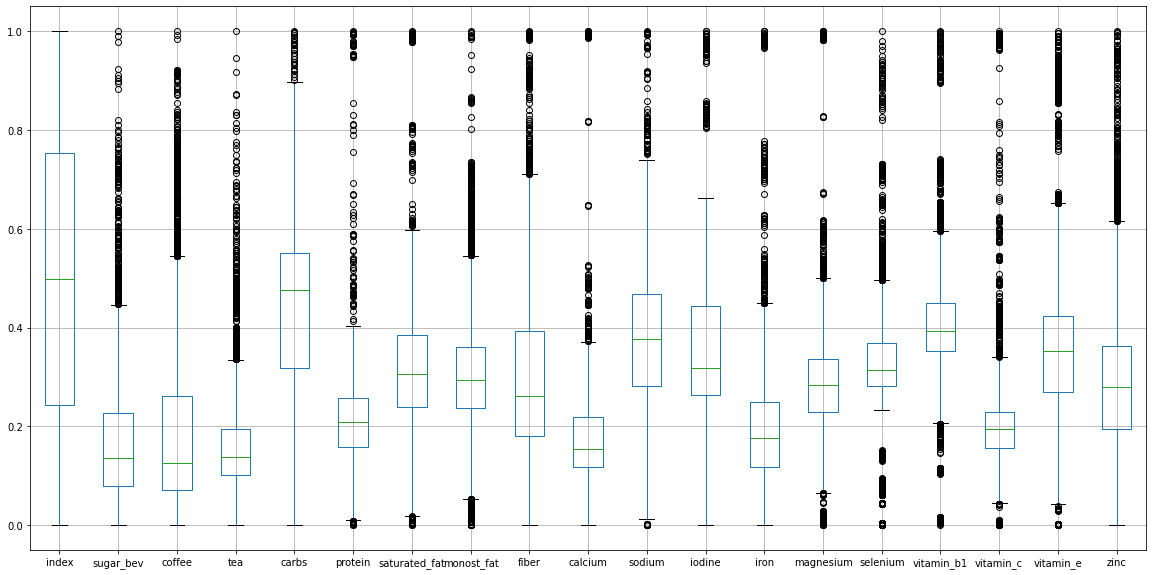

In [32]:
# Box and Whisker Plot
print(columns)
nutrients_df_box = nutrient_disease_df[columns]

nutrients_df_box = nutrients_df_box.reset_index() 

nutrients_df_box[columns] = nutrients_df_box[columns].astype(float)

# using min max normalization 
nutrients_mm_normalized = (nutrients_df_box - nutrients_df_box.min()) / (nutrients_df_box.max()-nutrients_df_box.min())
print(nutrients_mm_normalized)

print(nutrients_mm_normalized.boxplot(figsize=(20, 10)))

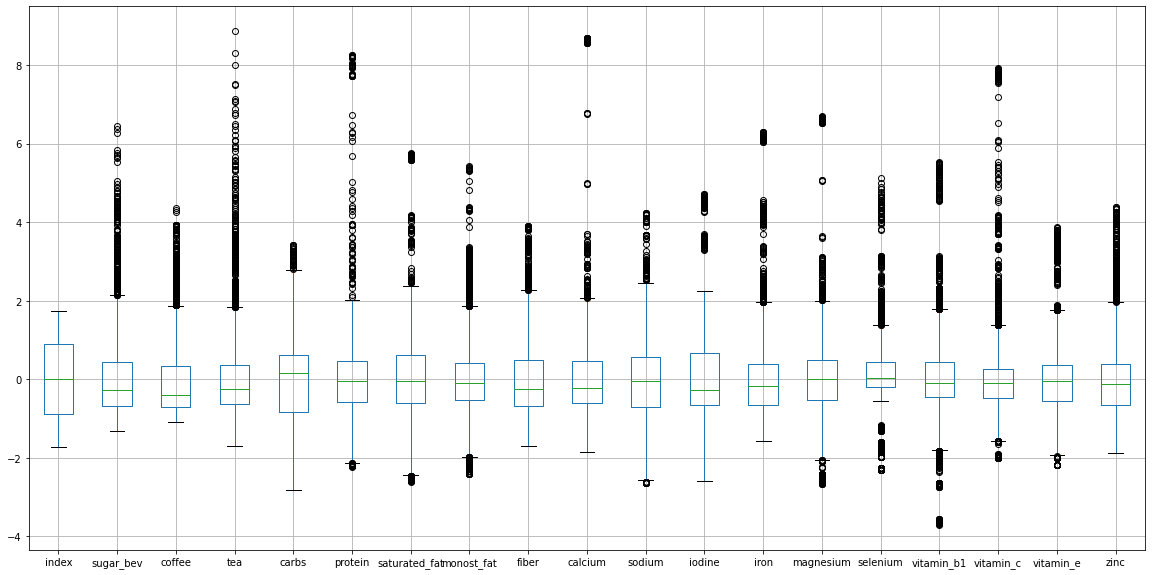

In [33]:
# using mean normalization 
nutrients_mean_normalized = (nutrients_df_box - nutrients_df_box.mean()) / nutrients_df_box.std()
nutrients_mean_normalized.boxplot(figsize=(20, 10))
#print(nutrients_mean_normalized.boxplot(figsize=(20, 10)))

## **2.1.3** Correlation Between Features and Outputs

Here we make a heatmap based off the correlation matrix for all nutrients to see if any of them are correlated. If this is the case, we will have to reduce the multicollinearity.

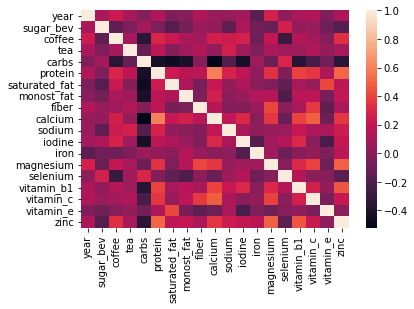

In [34]:
# make a correlation map of all the disease
nutrients_corr = nutrients_df.corr()

nutrients_heatmap = sns.heatmap(nutrients_corr)
  
plt.show()

Correlation matrix and heatmap for life expectancy and nutrients df

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

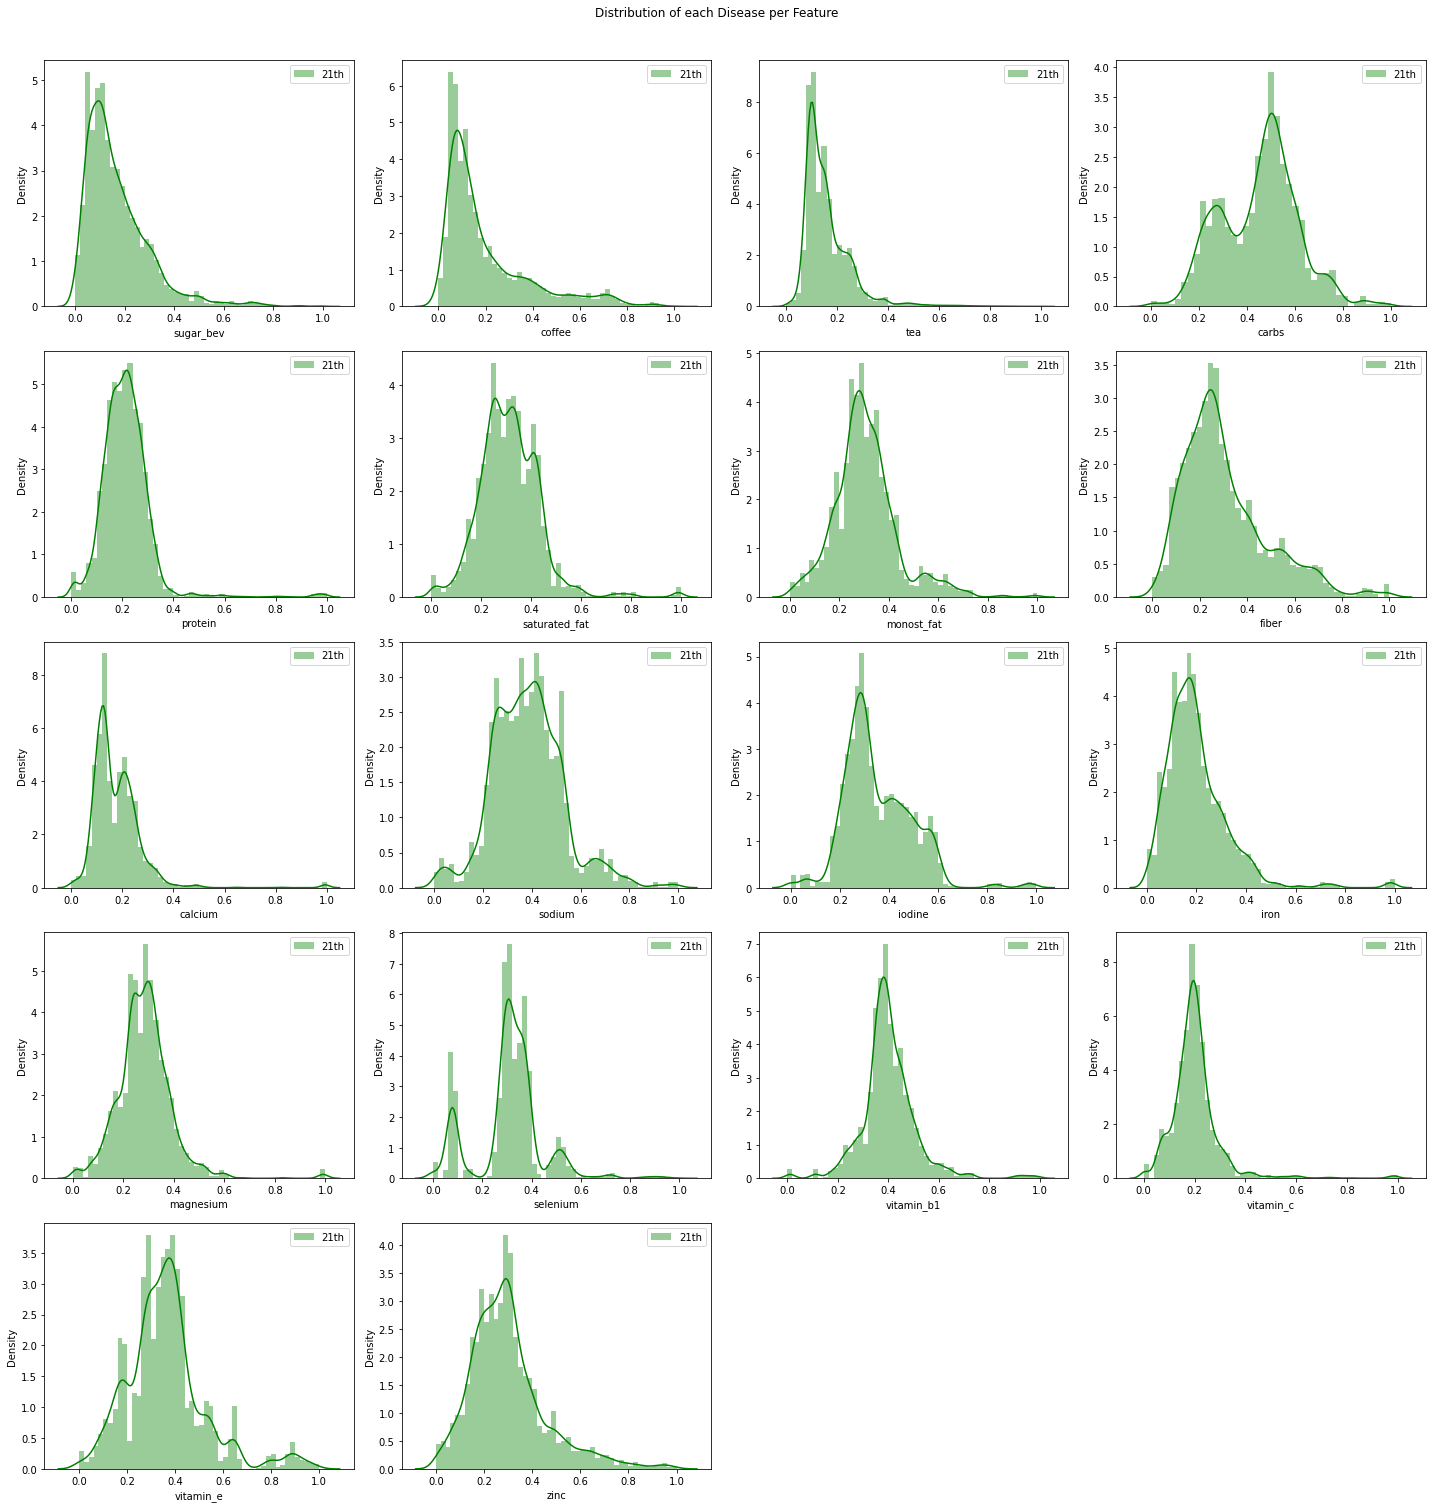

In [35]:
# Visualizing correlation between each features and the metric we are trying to predict 
# We are visualizing nutritions as they are continuous variables suitable for a distribution plot 

columns = nutrient_disease_df.columns[2:20]
df = nutrient_disease_df[columns]

df = (df - df.min()) / (df.max()-df.min())

fig = plt.figure(figsize = (20, 25)) 
j = 0 
for i in columns:
  plt.subplot(6, 4, j+1) 
  j += 1 
  # make a distribution plot of each feature 
  sns.distplot(df[i], color='g', label = '21th')
  plt.legend(loc='best')



fig.suptitle("Distribution of each Disease per Feature") 
fig.tight_layout() 
fig.subplots_adjust(top=0.95)
plt.show() 

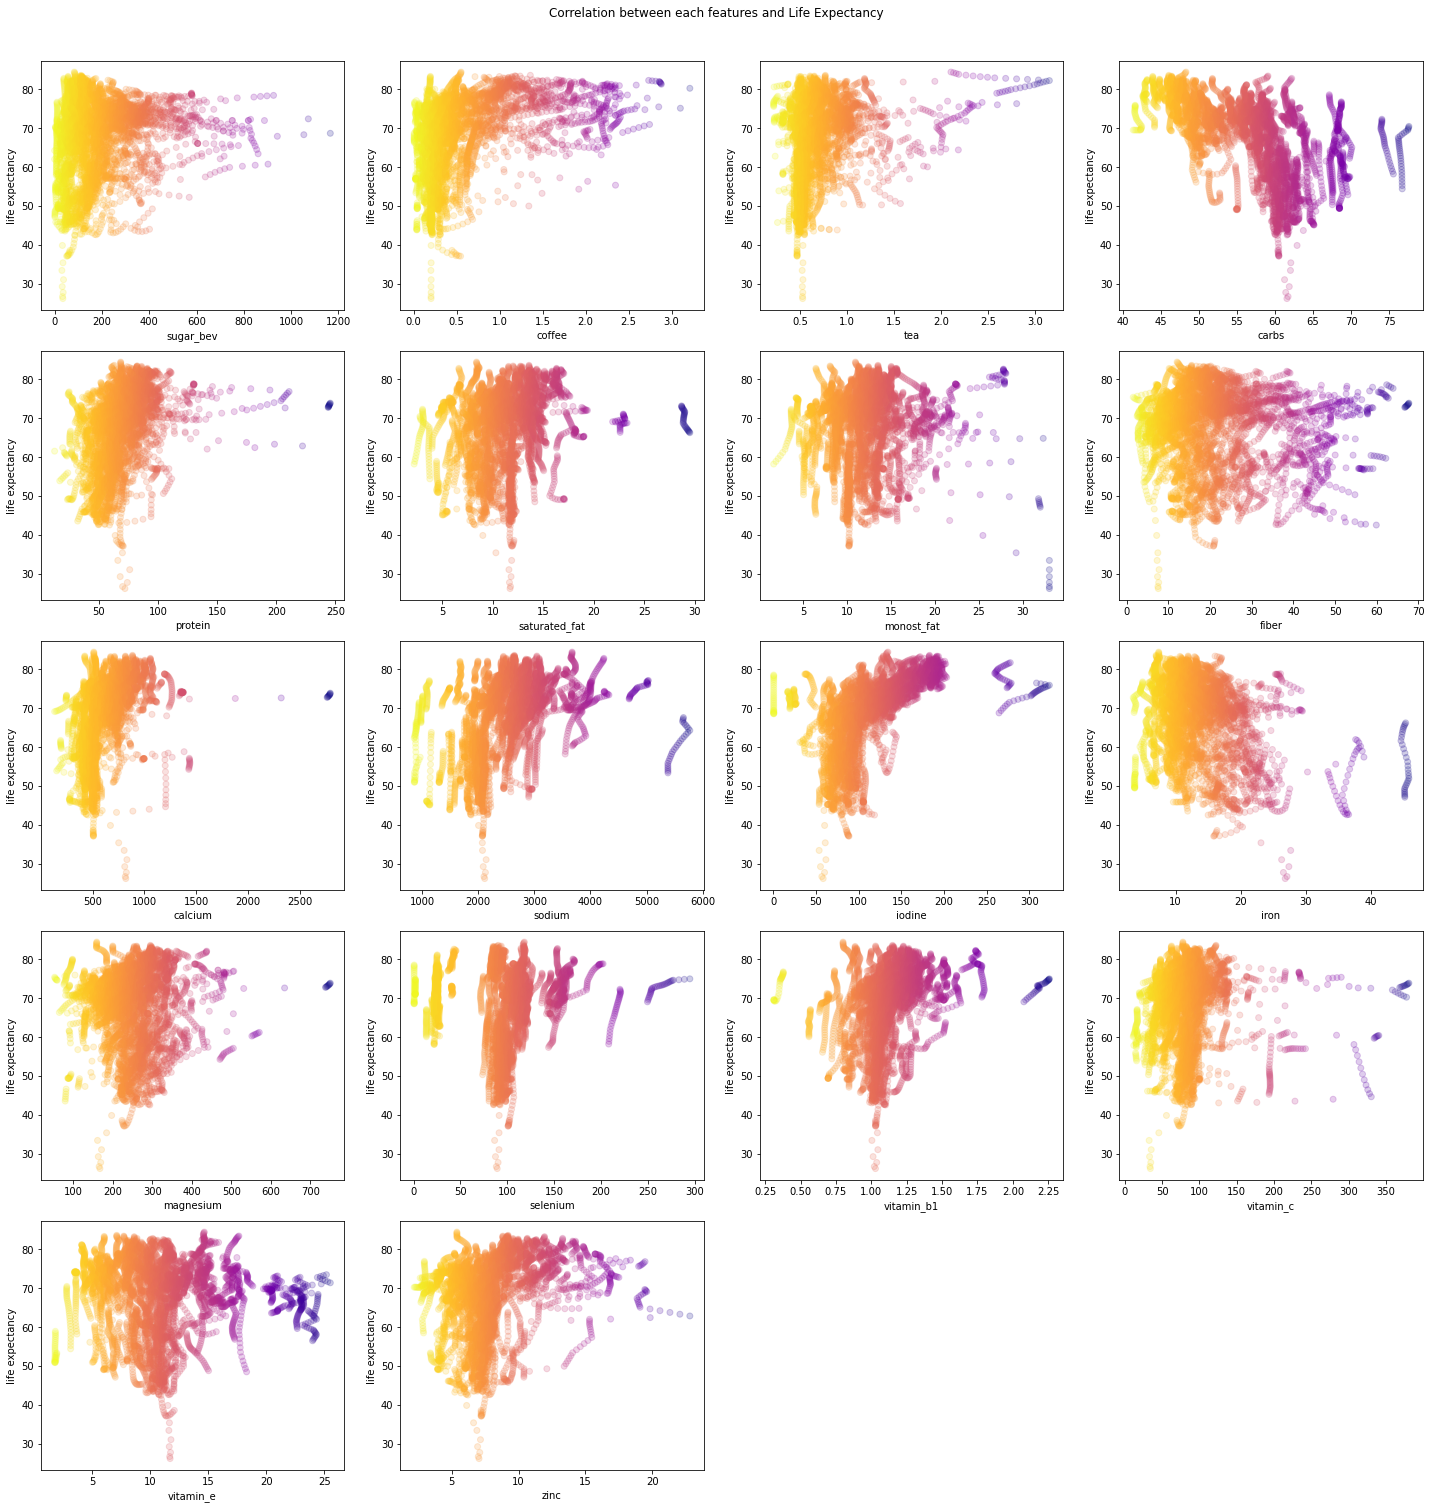

In [36]:
# Graphing correlations between each nutrient and life expectancy 
le_y = life_expectancy_nutrients_df['life expectancy']

fig = plt.figure(figsize = (20, 25)) 
j = 0 
for i in columns:
  plt.subplot(6, 4, j+1) 
  j += 1 
  
  plt.scatter(life_expectancy_nutrients_df[i], le_y, alpha=0.2, c=life_expectancy_nutrients_df[i], cmap='plasma_r')
  plt.xlabel(i)
  plt.ylabel("life expectancy")



fig.suptitle("Correlation between each features and Life Expectancy") 
fig.tight_layout() 
fig.subplots_adjust(top=0.95)
plt.show() 

# **3** Feature Engineering

## **3.1** Label Encodings

Currently the country codes in the dataframes are string data types and cannot be used. One hot encoding would result in an explosion in the number of columns, so we decided to use label encodings for the country code and the country categorical variable.

In [37]:
# changing country to label encoding in life expectancy df
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
life_expectancy_nutrients_df['country'] = le.fit_transform(life_expectancy_nutrients_df['country'])

In [38]:
life_expectancy_nutrients_df

,country,year,sugar_bev,coffee,tea,carbs,protein,saturated_fat,monost_fat,fiber,calcium,sodium,iodine,iron,magnesium,selenium,vitamin_b1,vitamin_c,vitamin_e,zinc,location_name,life expectancy
0,0,1990,7.10665,0.5358,1.13517,67.5209,48.0379,7.84251,5.06388,54.7553,404.098,3020.09,75.2149,24.4573,186.245,73.6108,0.974637,31.7641,7.70569,6.84439,Afghanistan,50.331
1,0,1991,6.51661,0.53693,1.12796,67.5187,48.9756,7.8257,5.06163,53.2336,405.292,3019.76,73.8909,24.2759,187.469,74.0849,0.975223,32.1386,7.62662,6.8354,Afghanistan,50.999
2,0,1992,5.92658,0.53806,1.12075,67.5165,49.9132,7.8089,5.05938,51.7118,406.487,3019.43,72.5668,24.0945,188.693,74.5591,0.975809,32.5132,7.54755,6.82642,Afghanistan,51.641
3,0,1993,5.33655,0.53919,1.11354,67.5142,50.8508,7.79209,5.05712,50.1901,407.681,3019.11,71.2428,23.9131,189.917,75.0332,0.976395,32.8877,7.46848,6.81743,Afghanistan,52.256
4,0,1994,4.74651,0.54032,1.10633,67.512,51.7885,7.77529,5.05487,48.6684,408.875,3018.78,69.9187,23.7317,191.14,75.5074,0.97698,33.2622,7.3894,6.80844,Afghanistan,52.842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,184,2014,377.992,0.151076,0.482405,60.8667,54.2506,8.60271,11.7341,18.7205,441.301,1884.71,94.9355,18.8959,277.095,91.6032,1.009,94.5476,9.55698,5.60335,Zimbabwe,58.410
5361,184,2015,411.77,0.152202,0.473849,60.9653,52.7081,8.59868,11.732,18.6583,441.665,1881.56,93.8549,18.8793,278.126,91.8455,1.00993,95.6876,9.53345,5.60413,Zimbabwe,59.534
5362,184,2016,377.316,0.152062,0.473342,60.9453,52.7433,8.59314,11.7262,18.2778,441.98,1883.18,93.0725,19.4607,278.735,91.7698,1.01141,96.0288,9.56313,5.61543,Zimbabwe,60.294
5363,184,2017,342.862,0.151921,0.472835,60.9252,52.7785,8.5876,11.7203,17.8972,442.296,1884.8,92.29,20.0421,279.344,91.694,1.01289,96.37,9.59281,5.62673,Zimbabwe,60.812


In [39]:
# changing country to label encoding in nutrient df
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
nutrient_disease_df['country'] = le.fit_transform(nutrient_disease_df['country'])


In [40]:
# one hot encoding for sex_name in nutrient df

# **4** Modelling for Life Expectancy

## **4.1** PCA

In this section we use PCA to reduce the number of dimensions in our dataset.

In [41]:
# split dataframe into features and metric to be predicted
import matplotlib.cm as cm 

le_x = life_expectancy_nutrients_df.drop(["location_name", "country", "year", "life expectancy"], axis=1)
le_y = life_expectancy_nutrients_df["life expectancy"]

Next, we plot out some of our data to observe general trends.

Text(0, 0.5, 'life expectancy')

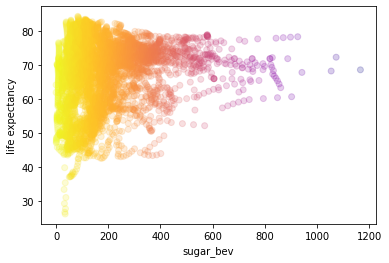

In [42]:
# plotting some of the variables to check for general trends 

plt.scatter(le_x["sugar_bev"], le_y, alpha=0.2, c=le_x["sugar_bev"], cmap='plasma_r')
plt.xlabel("sugar_bev")
plt.ylabel("life expectancy")

In [43]:
life_expectancy_nutrients_df

,country,year,sugar_bev,coffee,tea,carbs,protein,saturated_fat,monost_fat,fiber,calcium,sodium,iodine,iron,magnesium,selenium,vitamin_b1,vitamin_c,vitamin_e,zinc,location_name,life expectancy
0,0,1990,7.10665,0.5358,1.13517,67.5209,48.0379,7.84251,5.06388,54.7553,404.098,3020.09,75.2149,24.4573,186.245,73.6108,0.974637,31.7641,7.70569,6.84439,Afghanistan,50.331
1,0,1991,6.51661,0.53693,1.12796,67.5187,48.9756,7.8257,5.06163,53.2336,405.292,3019.76,73.8909,24.2759,187.469,74.0849,0.975223,32.1386,7.62662,6.8354,Afghanistan,50.999
2,0,1992,5.92658,0.53806,1.12075,67.5165,49.9132,7.8089,5.05938,51.7118,406.487,3019.43,72.5668,24.0945,188.693,74.5591,0.975809,32.5132,7.54755,6.82642,Afghanistan,51.641
3,0,1993,5.33655,0.53919,1.11354,67.5142,50.8508,7.79209,5.05712,50.1901,407.681,3019.11,71.2428,23.9131,189.917,75.0332,0.976395,32.8877,7.46848,6.81743,Afghanistan,52.256
4,0,1994,4.74651,0.54032,1.10633,67.512,51.7885,7.77529,5.05487,48.6684,408.875,3018.78,69.9187,23.7317,191.14,75.5074,0.97698,33.2622,7.3894,6.80844,Afghanistan,52.842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,184,2014,377.992,0.151076,0.482405,60.8667,54.2506,8.60271,11.7341,18.7205,441.301,1884.71,94.9355,18.8959,277.095,91.6032,1.009,94.5476,9.55698,5.60335,Zimbabwe,58.410
5361,184,2015,411.77,0.152202,0.473849,60.9653,52.7081,8.59868,11.732,18.6583,441.665,1881.56,93.8549,18.8793,278.126,91.8455,1.00993,95.6876,9.53345,5.60413,Zimbabwe,59.534
5362,184,2016,377.316,0.152062,0.473342,60.9453,52.7433,8.59314,11.7262,18.2778,441.98,1883.18,93.0725,19.4607,278.735,91.7698,1.01141,96.0288,9.56313,5.61543,Zimbabwe,60.294
5363,184,2017,342.862,0.151921,0.472835,60.9252,52.7785,8.5876,11.7203,17.8972,442.296,1884.8,92.29,20.0421,279.344,91.694,1.01289,96.37,9.59281,5.62673,Zimbabwe,60.812


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  import sys


[Text(0, 0.5, 'life expectancy'), Text(0.5, 0, 'monost_fat')]

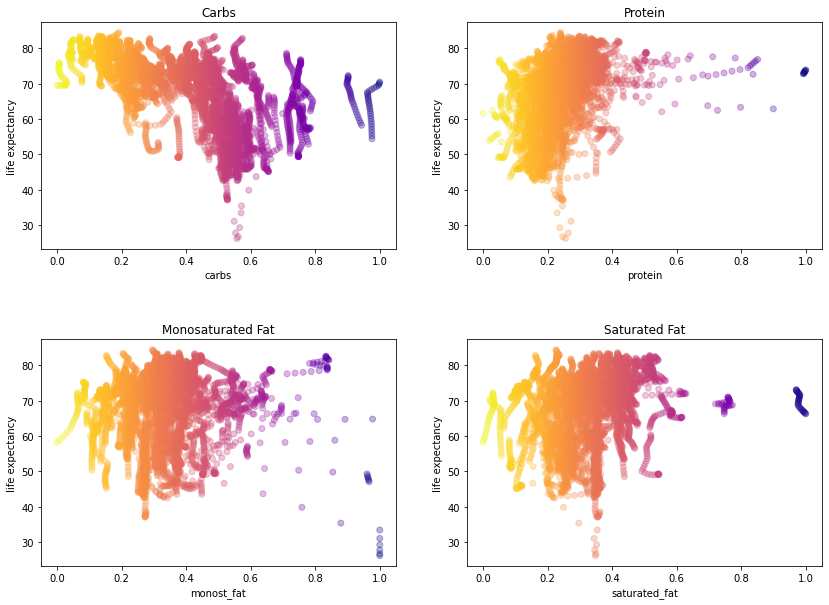

In [44]:
# to visualize trends of multiple nutrients at once, normalize the data and graph
features_df = life_expectancy_nutrients_df[["carbs", "protein", "saturated_fat", "monost_fat"]]
normalized_df = (features_df - features_df.min()) / (features_df.max()-features_df.min())
normalized_df = normalized_df.astype(float)

fig, axs = plt.subplots(2, 2, figsize=(14, 10), constrained_layout= True)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)
axs[0, 0].scatter(normalized_df["carbs"], le_y, alpha = 0.3, c=le_x["carbs"], cmap='plasma_r')
axs[0, 0].set_title('Carbs')
axs[0, 0].set(xlabel="carbs", ylabel="life expectancy")

axs[0, 1].scatter(normalized_df["protein"], le_y, alpha = 0.3, c=le_x["protein"], cmap='plasma_r')
axs[0, 1].set_title('Protein')
axs[0, 1].set(xlabel="protein", ylabel="life expectancy")

axs[1, 1].scatter(normalized_df["saturated_fat"], le_y, alpha = 0.3, c=le_x["saturated_fat"], cmap='plasma_r')
axs[1, 1].set_title('Saturated Fat')
axs[1, 1].set(xlabel="saturated_fat", ylabel="life expectancy")

axs[1, 0].scatter(normalized_df["monost_fat"], le_y, alpha = 0.3, c=le_x["monost_fat"], cmap='plasma_r')
axs[1, 0].set_title('Monosaturated Fat')
axs[1, 0].set(xlabel="monost_fat", ylabel="life expectancy")

We can observe from the above graphics that some features are closely correlated other features while some features provides a completely different line of best fit. We will use PCA for dimensionality reduction to reduce multicolinearity. For PCA, we will standardize the features between 0 and 1 using StandardScaler. This removes the mean and scales to unit variance.

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Conducting PCA on nutritional features

pca_features = life_expectancy_nutrients_df.columns[0:19] 
features_df = life_expectancy_nutrients_df[pca_features]
features_df = features_df.dropna()
features_df = StandardScaler().fit_transform(features_df)
print(features_df)

[[-1.72271354 -1.67332005 -1.21221185 ... -0.67973832 -1.41888165
  -0.73501634]
 [-1.72271354 -1.55379719 -1.2164039  ... -0.67684255 -1.40865309
  -0.75462369]
 [-1.72271354 -1.43427433 -1.22059596 ... -0.67394679 -1.39842452
  -0.77423104]
 ...
 [ 1.72271354  1.43427433  1.418044   ... -0.49795947  0.33612486
  -0.27443262]
 [ 1.72271354  1.55379719  1.17325678 ... -0.49063375  0.34544246
  -0.26707328]
 [ 1.72271354  1.67332005  0.92846956 ... -0.48330803  0.35476006
  -0.25971394]]


In [46]:
# total 17 nutritional features 
pca = PCA(n_components=17) 
features_2 = pca.fit_transform(features_df)

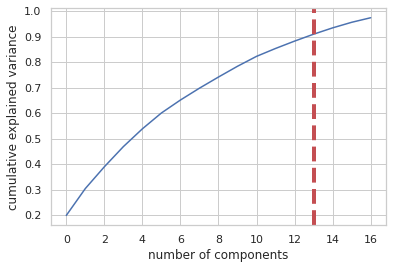

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.199186,0.199186
1,0.304381,0.105195
2,0.389667,0.085286
3,0.468660,0.078993
4,0.538401,0.069741
5,0.600469,0.062068
6,0.651219,0.050749
7,0.697660,0.046441
8,0.741304,0.043644
9,0.783472,0.042168


In [47]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=13, ymin=0, ymax=1)

display(plt.show())

evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

# np.set_printoptions(suppress=True)
# print(pca.explained_variance_ratio_.sort())
# plt.plot(pca.explained_variance_ratio_)


With the cutoff at 0.95, we can reduce our dimension to the 13 features, and run the PCA again with 13 as a new parameter.Later in modeling, we will be using n_components = 13 to fit our data before training the model.

## **4.2** Random Forest Model

Here we use a Random Forest Models, which can return a variable importance list for further dimensionnality reduction. This tells us which variables can serve as best predictors of life expectancy.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

features = life_expectancy_nutrients_df.columns[0:19]
vi_x = life_expectancy_nutrients_df[features]# all the columns in our features 
vi_y = life_expectancy_nutrients_df[['life expectancy']]
print(len(vi_x))
print(len(vi_y))
x_train, x_test, y_train, y_test = train_test_split(vi_x, vi_y, test_size = 0.3); # 70% training, 30% test

# how to optimize n_estimator? 
regressor = RandomForestRegressor(n_estimators=13); 

# train the model 
print(x_train.dtypes)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test); 

5365
5365
country           int64
year             object
sugar_bev        object
coffee           object
tea              object
carbs            object
protein          object
saturated_fat    object
monost_fat       object
fiber            object
calcium          object
sodium           object
iodine           object
iron             object
magnesium        object
selenium         object
vitamin_b1       object
vitamin_c        object
vitamin_e        object
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [49]:
print(y_pred)
print(len(y_pred))
print(len(y_test))
print(len(x_test))

[71.10084615 50.98384615 67.89930769 ... 75.56607692 55.42469231
 75.62946154]
1610
1610
1610


In [50]:
from sklearn import metrics
feature_importances = regressor.feature_importances_
feature_names = regressor.feature_names_in_


feature_importances, feature_names = zip(*sorted(zip(feature_importances, feature_names)))
print(feature_names)
print(feature_importances)

('vitamin_c', 'saturated_fat', 'vitamin_b1', 'magnesium', 'tea', 'sugar_bev', 'monost_fat', 'vitamin_e', 'fiber', 'protein', 'coffee', 'calcium', 'country', 'iron', 'year', 'sodium', 'selenium', 'carbs', 'iodine')
(0.004512018046880951, 0.004976700185625221, 0.007561563392798736, 0.0099185998857061, 0.013608966610715019, 0.013626922432644961, 0.013777914158353546, 0.014168893592691616, 0.014759503412303523, 0.015726959630683372, 0.015956111231256988, 0.01934957026816153, 0.027394532660272513, 0.03553892136432715, 0.03627849078330397, 0.04571466385012264, 0.07179919770014923, 0.2127603660598138, 0.42257010473418916)


Here we plot the features and there importance to see which features are more important in predicting life expectancy.

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text major ticklabel objects>)

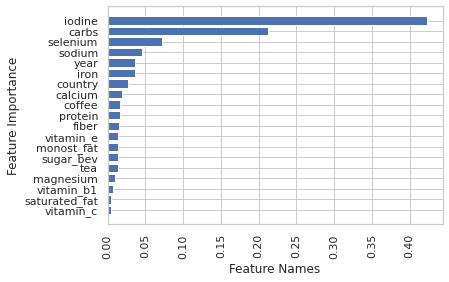

In [51]:
# how to plot 
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Names")
plt.ylabel("Feature Importance")
plt.xticks(rotation = 90)

Here is the root mean square error for this model.

In [52]:
# Root mean squared error
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rms)

Root Mean Squared Error:  1.3231991520641833


Now that we have variable importance, we will evaluate accuracy scores using different numbers of variables chosen by importance

In [53]:
# Select top 5 by feature importance
feature_list = list(feature_names)
print(feature_list)
feature_names_sorted = feature_list[::-1]
print(feature_names_sorted)
top_three = feature_names_sorted[0: 3]
top_five = feature_names_sorted[0: 5]
top_seven = feature_names_sorted[0: 7]
top_nine = feature_names_sorted[0: 9] 
top_eleven = feature_names_sorted[0: 11]
top_fifteen =  feature_names_sorted[0: 15]
top_all = feature_names_sorted
y = life_expectancy_nutrients_df[['life expectancy']]


results = [] 
rankings = [top_three, top_five, top_seven, top_nine, top_eleven, top_fifteen, features]
for each in rankings: 
    x_train, x_test, y_train, y_test = train_test_split(life_expectancy_nutrients_df[each], y, test_size = 0.3); # 70% training, 30% test
    regressor = RandomForestRegressor(n_estimators=100); 
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test); 
    # calculate RMS Error 
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(rms)

print(results)


['vitamin_c', 'saturated_fat', 'vitamin_b1', 'magnesium', 'tea', 'sugar_bev', 'monost_fat', 'vitamin_e', 'fiber', 'protein', 'coffee', 'calcium', 'country', 'iron', 'year', 'sodium', 'selenium', 'carbs', 'iodine']
['iodine', 'carbs', 'selenium', 'sodium', 'year', 'iron', 'country', 'calcium', 'coffee', 'protein', 'fiber', 'vitamin_e', 'monost_fat', 'sugar_bev', 'tea', 'magnesium', 'vitamin_b1', 'saturated_fat', 'vitamin_c']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed whe

[2.227499132930323, 1.3955449019275463, 0.9484773060989172, 1.1912691620942901, 1.2068397285373675, 1.156735996020376, 1.1650259499730817]


[3, 5, 7, 9, 11, 15, 19]
[2.227499132930323, 1.3955449019275463, 0.9484773060989172, 1.1912691620942901, 1.2068397285373675, 1.156735996020376, 1.1650259499730817]


Text(0, 0.5, 'Root Mean Squared Error')

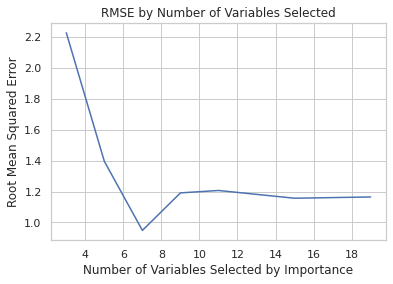

In [54]:
# Visualizing the accuracy by variable importance 
def count(arr): 
  return len(arr)
x_axis = list(map(count, rankings))
print(x_axis)
y_axis = results 
print(results)
plt.plot(x_axis, y_axis)
plt.title("RMSE by Number of Variables Selected")
plt.xlabel("Number of Variables Selected by Importance")
plt.ylabel("Root Mean Squared Error")

Observe that selecting a small number of variables with high importance scores fared worse than selecting every single available feature to be used in the model. We can also see that the trial with the lowest root mean squared error was when we selected 15 features, meaning that there is a goldilocks zone of the number of features that should be applied to the model.

## **4.3** Ordinary Least Squares Model

We now expand on our predictive models by using Ordinary Least Squares model which can provide us with a distribution, or predictions with confidence intervals

In [55]:
!pip install statsmodels
import statsmodels.api as sm
import pandas as pd


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Here we print out a summary of our results from using Ordinary Least Squares Regresison

In [56]:
le_df_ols = life_expectancy_nutrients_df

x = life_expectancy_nutrients_df[features]
x = StandardScaler().fit_transform(x)
y = life_expectancy_nutrients_df['life expectancy'].tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.70, random_state = 5)  

#x_train = sm.add_constant(x_train).astype(np.float)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

result = sm.OLS(y_train, x_train)
ols_model = result.fit() 
print(ols_model.summary()) 
print(x_test.shape)
y_pred = ols_model.predict(x_test)

print("Parametesr: ", ols_model.params)
print("Standard errors: ", ols_model.bse)
print("R2: ", ols_model.rsquared) 
print("Predicted values: ", ols_model.predict(x_test))
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rms)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     209.0
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        03:43:51   Log-Likelihood:                -4911.0
No. Observations:                1609   AIC:                             9862.
Df Residuals:                    1589   BIC:                             9970.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.0812      0.130    525.521      0.0

## **4.4** XGB

XGBoost is a popular implementation of Gradient Boosting because of its speed and performance.

XGB represents all problems as a regression predictive modeling problem that only takes numerical values as input.

We use XGB in order to evaluate the predictiveness of the data using this model.

In [57]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.70, random_state = 5)  

model = XGBClassifier()
model.fit(x_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(x_test)
# evaluate predictions
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rms)

XGBClassifier(objective='multi:softprob')
Root Mean Squared Error:  5.676275680300885


# **5** Modeling for Type 2 Diabetes

The processes used to model Type 2 Diabetes is conceptually similar to that of life expectancy. We use the same procedure and techniques in order to be able to compare the different stats that we use for this project.

In [58]:
nutrient_disease_df

,country,year,sugar_bev,coffee,tea,carbs,protein,saturated_fat,monost_fat,fiber,calcium,sodium,iodine,iron,magnesium,selenium,vitamin_b1,vitamin_c,vitamin_e,zinc,sex_name,% death diabetes 1,% death diabetes 2,% death ischemic heart,% death rheumatic heart
12,0,2002,22.1585,0.531078,0.864413,66.0881,50.3635,7.5437,5.17162,45.4854,408.968,3035.07,69.2495,21.3117,209.206,76.2239,1.00512,35.3291,6.98787,7.26107,Male,0.082996,0.518513,12.084087,0.284704
13,0,2003,30.531,0.532262,0.786346,66.0456,49.2467,7.55745,5.18493,45.539,410.534,3038.54,69.8323,21.2341,211.704,76.3498,1.00957,35.8142,6.97067,7.30393,Male,0.089643,0.542217,12.304948,0.295365
17,0,2007,71.8112,0.536864,0.830817,65.9219,50.075,7.61629,5.2052,44.9443,421.216,3049.39,72.1094,20.6109,223.159,77.211,1.02606,37.3874,6.80624,7.52775,Male,0.099968,0.591194,12.287590,0.290179
18,0,2008,84.0788,0.53798,0.93112,65.9025,51.6059,7.63196,5.20203,44.5934,424.991,3051.34,72.6651,20.3769,226.388,77.5158,1.02987,37.689,6.74123,7.5968,Male,0.103333,0.612376,12.460753,0.290067
19,0,2009,96.3464,0.539097,1.03142,65.8831,53.1368,7.64763,5.19886,44.2424,428.766,3053.3,73.2208,20.1429,229.616,77.8207,1.03367,37.9905,6.67622,7.66586,Male,0.106955,0.637302,12.603209,0.288927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16090,166,2014,377.992,0.151076,0.482405,60.8667,54.2506,8.60271,11.7341,18.7205,441.301,1884.71,94.9355,18.8959,277.095,91.6032,1.009,94.5476,9.55698,5.60335,Both,0.078079,2.215055,5.842153,0.417563
16091,166,2015,411.77,0.152202,0.473849,60.9653,52.7081,8.59868,11.732,18.6583,441.665,1881.56,93.8549,18.8793,278.126,91.8455,1.00993,95.6876,9.53345,5.60413,Both,0.081957,2.302917,6.052763,0.427562
16092,166,2016,377.316,0.152062,0.473342,60.9453,52.7433,8.59314,11.7262,18.2778,441.98,1883.18,93.0725,19.4607,278.735,91.7698,1.01141,96.0288,9.56313,5.61543,Both,0.086410,2.397429,6.278249,0.437392
16093,166,2017,342.862,0.151921,0.472835,60.9252,52.7785,8.5876,11.7203,17.8972,442.296,1884.8,92.29,20.0421,279.344,91.694,1.01289,96.37,9.59281,5.62673,Both,0.089851,2.470306,6.488029,0.445344


In [59]:
# split dataframe into features and metric to be predicted
le_x = nutrient_disease_df.drop(["sex_name", "country", "year", "% death diabetes 1", "% death ischemic heart", "% death rheumatic heart"], axis=1)
le_y = nutrient_disease_df["% death diabetes 2"]

Text(0, 0.5, '% death diabetes 2')

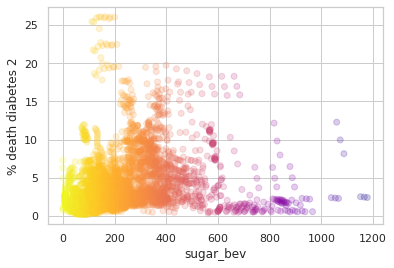

In [60]:
# plotting some of the variables to check for general trends 

plt.scatter(le_x["sugar_bev"], le_y, alpha=0.2, c=le_x["sugar_bev"], cmap='plasma_r')
plt.xlabel("sugar_bev")
plt.ylabel("% death diabetes 2")

In [61]:
nutrient_disease_df

,country,year,sugar_bev,coffee,tea,carbs,protein,saturated_fat,monost_fat,fiber,calcium,sodium,iodine,iron,magnesium,selenium,vitamin_b1,vitamin_c,vitamin_e,zinc,sex_name,% death diabetes 1,% death diabetes 2,% death ischemic heart,% death rheumatic heart
12,0,2002,22.1585,0.531078,0.864413,66.0881,50.3635,7.5437,5.17162,45.4854,408.968,3035.07,69.2495,21.3117,209.206,76.2239,1.00512,35.3291,6.98787,7.26107,Male,0.082996,0.518513,12.084087,0.284704
13,0,2003,30.531,0.532262,0.786346,66.0456,49.2467,7.55745,5.18493,45.539,410.534,3038.54,69.8323,21.2341,211.704,76.3498,1.00957,35.8142,6.97067,7.30393,Male,0.089643,0.542217,12.304948,0.295365
17,0,2007,71.8112,0.536864,0.830817,65.9219,50.075,7.61629,5.2052,44.9443,421.216,3049.39,72.1094,20.6109,223.159,77.211,1.02606,37.3874,6.80624,7.52775,Male,0.099968,0.591194,12.287590,0.290179
18,0,2008,84.0788,0.53798,0.93112,65.9025,51.6059,7.63196,5.20203,44.5934,424.991,3051.34,72.6651,20.3769,226.388,77.5158,1.02987,37.689,6.74123,7.5968,Male,0.103333,0.612376,12.460753,0.290067
19,0,2009,96.3464,0.539097,1.03142,65.8831,53.1368,7.64763,5.19886,44.2424,428.766,3053.3,73.2208,20.1429,229.616,77.8207,1.03367,37.9905,6.67622,7.66586,Male,0.106955,0.637302,12.603209,0.288927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16090,166,2014,377.992,0.151076,0.482405,60.8667,54.2506,8.60271,11.7341,18.7205,441.301,1884.71,94.9355,18.8959,277.095,91.6032,1.009,94.5476,9.55698,5.60335,Both,0.078079,2.215055,5.842153,0.417563
16091,166,2015,411.77,0.152202,0.473849,60.9653,52.7081,8.59868,11.732,18.6583,441.665,1881.56,93.8549,18.8793,278.126,91.8455,1.00993,95.6876,9.53345,5.60413,Both,0.081957,2.302917,6.052763,0.427562
16092,166,2016,377.316,0.152062,0.473342,60.9453,52.7433,8.59314,11.7262,18.2778,441.98,1883.18,93.0725,19.4607,278.735,91.7698,1.01141,96.0288,9.56313,5.61543,Both,0.086410,2.397429,6.278249,0.437392
16093,166,2017,342.862,0.151921,0.472835,60.9252,52.7785,8.5876,11.7203,17.8972,442.296,1884.8,92.29,20.0421,279.344,91.694,1.01289,96.37,9.59281,5.62673,Both,0.089851,2.470306,6.488029,0.445344


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  import sys


[Text(0, 0.5, '% death diabetes 2'), Text(0.5, 0, 'monost_fat')]

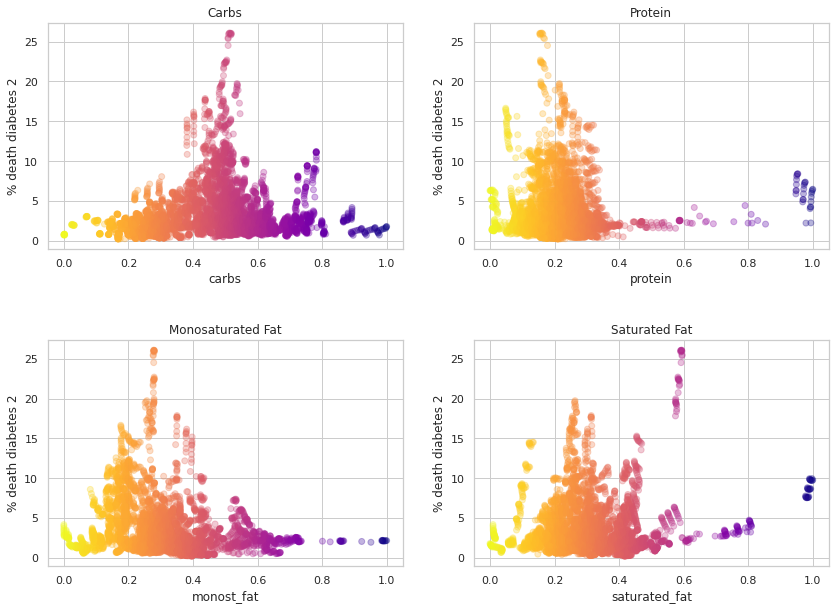

In [62]:
# to visualize trends of multiple nutrients at once, normalize the data and graph
features_df = nutrient_disease_df[["carbs", "protein", "saturated_fat", "monost_fat"]]
normalized_df = (features_df - features_df.min()) / (features_df.max()-features_df.min())
normalized_df = normalized_df.astype(float)

fig, axs = plt.subplots(2, 2, figsize=(14, 10), constrained_layout= True)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)
axs[0, 0].scatter(normalized_df["carbs"], le_y, alpha = 0.3, c=le_x["carbs"], cmap='plasma_r')
axs[0, 0].set_title('Carbs')
axs[0, 0].set(xlabel="carbs", ylabel="% death diabetes 2")

axs[0, 1].scatter(normalized_df["protein"], le_y, alpha = 0.3, c=le_x["protein"], cmap='plasma_r')
axs[0, 1].set_title('Protein')
axs[0, 1].set(xlabel="protein", ylabel="% death diabetes 2")

axs[1, 1].scatter(normalized_df["saturated_fat"], le_y, alpha = 0.3, c=le_x["saturated_fat"], cmap='plasma_r')
axs[1, 1].set_title('Saturated Fat')
axs[1, 1].set(xlabel="saturated_fat", ylabel="% death diabetes 2")

axs[1, 0].scatter(normalized_df["monost_fat"], le_y, alpha = 0.3, c=le_x["monost_fat"], cmap='plasma_r')
axs[1, 0].set_title('Monosaturated Fat')
axs[1, 0].set(xlabel="monost_fat", ylabel="% death diabetes 2")

PCA

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Conducting PCA on nutritional features

pca_features = nutrient_disease_df.columns[0:19] 
features_df = nutrient_disease_df[pca_features]
features_df = features_df.dropna()
features_df = StandardScaler().fit_transform(features_df)
print(features_df)

[[-1.72988836 -2.43638987 -1.17027123 ... -0.61473069 -1.46725628
  -0.87126454]
 [-1.72988836 -2.19841634 -1.11508174 ... -0.59369729 -1.4540933
  -0.87564977]
 [-1.72988836 -1.24652221 -0.8429733  ... -0.51563416 -1.41140365
  -0.91756823]
 ...
 [ 1.71421853  0.89523958  1.17083839 ... -0.58497873  0.17980952
  -0.2147312 ]
 [ 1.71421853  1.13321311  0.94372699 ... -0.57796522  0.18906763
  -0.20716496]
 [ 1.71421853  1.37118664  0.71661559 ... -0.57095171  0.19832575
  -0.19959872]]


In [64]:
# total 17 nutritional features 
pca = PCA(n_components=17) 
features_2 = pca.fit_transform(features_df)

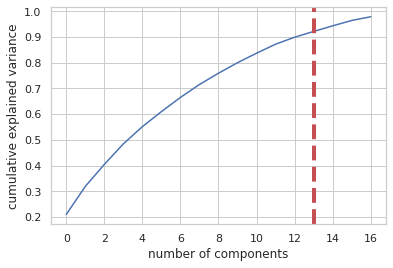

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.209663,0.209663
1,0.318750,0.109087
2,0.404303,0.085553
3,0.484256,0.079953
4,0.551202,0.066946
5,0.609651,0.058449
6,0.664843,0.055192
7,0.715189,0.050347
8,0.759032,0.043843
9,0.799975,0.040942


In [65]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=13, ymin=0, ymax=1)

display(plt.show())

evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

# np.set_printoptions(suppress=True)
# print(pca.explained_variance_ratio_.sort())
# plt.plot(pca.explained_variance_ratio_)


Random Forest Model

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

features = nutrient_disease_df.columns[0:19]
vi_x = nutrient_disease_df[features]# all the columns in our features 
vi_y = nutrient_disease_df[['% death diabetes 2']]
print(len(vi_x))
print(len(vi_y))
x_train, x_test, y_train, y_test = train_test_split(vi_x, vi_y, test_size = 0.3); # 70% training, 30% test

# how to optimize n_estimator? 
regressor = RandomForestRegressor(n_estimators=13); 

# train the model 
print(x_train.dtypes)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test); 

5847
5847
country           int64
year             object
sugar_bev        object
coffee           object
tea              object
carbs            object
protein          object
saturated_fat    object
monost_fat       object
fiber            object
calcium          object
sodium           object
iodine           object
iron             object
magnesium        object
selenium         object
vitamin_b1       object
vitamin_c        object
vitamin_e        object
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [67]:
from sklearn import metrics
feature_importances = regressor.feature_importances_
feature_names = regressor.feature_names_in_


feature_importances, feature_names = zip(*sorted(zip(feature_importances, feature_names)))
print(feature_names)
print(feature_importances)

('year', 'tea', 'protein', 'vitamin_c', 'iron', 'magnesium', 'carbs', 'calcium', 'iodine', 'coffee', 'vitamin_b1', 'monost_fat', 'sugar_bev', 'saturated_fat', 'vitamin_e', 'sodium', 'fiber', 'country', 'selenium')
(0.0014247113253306213, 0.007402187436181714, 0.012362297117380882, 0.018264154863932073, 0.020593988730198617, 0.020922566603468248, 0.028018926862188293, 0.03406985833462417, 0.03579657088655403, 0.03699426024763368, 0.04021470827473485, 0.05520557651229932, 0.058644661975498454, 0.06608072991795542, 0.07912387984014643, 0.09019832434206394, 0.09538326065342534, 0.10625235615892417, 0.1930469799174599)


In [68]:
# Root mean squared error
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rms)

Root Mean Squared Error:  0.46963133789438216


Least Squares Model

In [69]:
le_df_ols = life_expectancy_nutrients_df

x = nutrient_disease_df[features]
x = StandardScaler().fit_transform(x)
y = nutrient_disease_df['% death diabetes 2'].tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.70, random_state = 5)  

#x_train = sm.add_constant(x_train).astype(np.float)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

result = sm.OLS(y_train, x_train)
ols_model = result.fit() 
print(ols_model.summary()) 
print(x_test.shape)
y_pred = ols_model.predict(x_test)

print("Parametesr: ", ols_model.params)
print("Standard errors: ", ols_model.bse)
print("R2: ", ols_model.rsquared) 
print("Predicted values: ", ols_model.predict(x_test)) 
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rms)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     35.55
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          2.25e-109
Time:                        03:58:23   Log-Likelihood:                -4231.9
No. Observations:                1754   AIC:                             8504.
Df Residuals:                    1734   BIC:                             8613.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4307      0.065     52.627      0.0

XGB Model

In [70]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.70, random_state = 5)  

model = XGBClassifier()
model.fit(x_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(x_test)
# evaluate predictions
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rms)

XGBClassifier(objective='multi:softprob')
Root Mean Squared Error:  4.620967093712635


# **6** Modeling for Type 1 Diabetes


We repeated previous processing, including PCA, using the random forest model, ordinary least squares, and XGB.

In [71]:
# split dataframe into features and metric to be predicted
le_x = nutrient_disease_df.drop(["sex_name", "country", "year", "% death diabetes 2", "% death ischemic heart", "% death rheumatic heart"], axis=1)
le_y = nutrient_disease_df["% death diabetes 1"]

Text(0, 0.5, '% death diabetes 1')

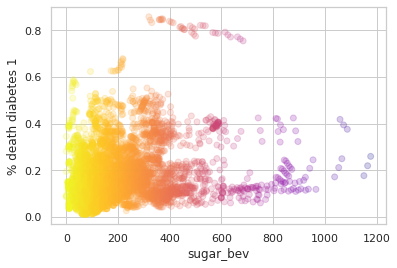

In [72]:
# plotting some of the variables to check for general trends 

plt.scatter(le_x["sugar_bev"], le_y, alpha=0.2, c=le_x["sugar_bev"], cmap='plasma_r')
plt.xlabel("sugar_bev")
plt.ylabel("% death diabetes 1")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  import sys


[Text(0, 0.5, '% death diabetes 1'), Text(0.5, 0, 'monost_fat')]

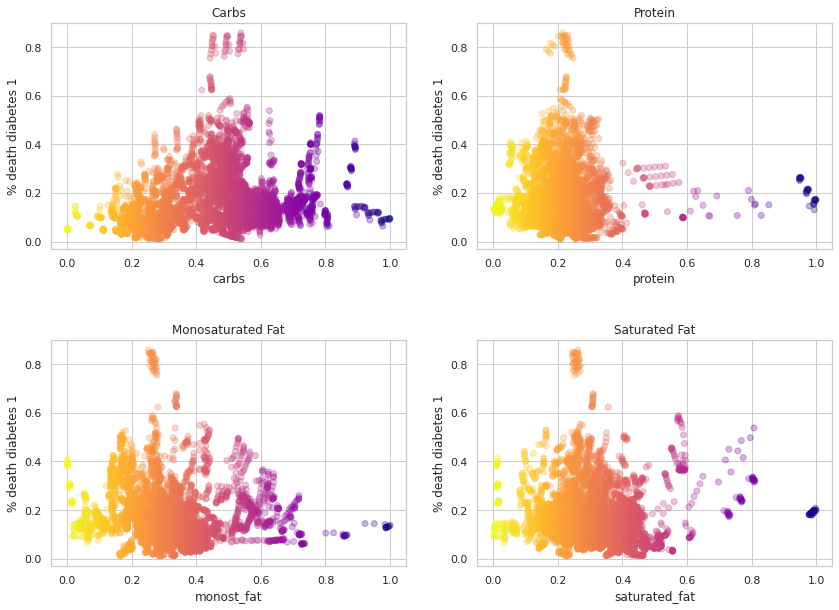

In [73]:
# to visualize trends of multiple nutrients at once, normalize the data and graph
features_df = nutrient_disease_df[["carbs", "protein", "saturated_fat", "monost_fat"]]
normalized_df = (features_df - features_df.min()) / (features_df.max()-features_df.min())
normalized_df = normalized_df.astype(float)

fig, axs = plt.subplots(2, 2, figsize=(14, 10), constrained_layout= True)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)
axs[0, 0].scatter(normalized_df["carbs"], le_y, alpha = 0.3, c=le_x["carbs"], cmap='plasma_r')
axs[0, 0].set_title('Carbs')
axs[0, 0].set(xlabel="carbs", ylabel="% death diabetes 1")

axs[0, 1].scatter(normalized_df["protein"], le_y, alpha = 0.3, c=le_x["protein"], cmap='plasma_r')
axs[0, 1].set_title('Protein')
axs[0, 1].set(xlabel="protein", ylabel="% death diabetes 1")

axs[1, 1].scatter(normalized_df["saturated_fat"], le_y, alpha = 0.3, c=le_x["saturated_fat"], cmap='plasma_r')
axs[1, 1].set_title('Saturated Fat')
axs[1, 1].set(xlabel="saturated_fat", ylabel="% death diabetes 1")

axs[1, 0].scatter(normalized_df["monost_fat"], le_y, alpha = 0.3, c=le_x["monost_fat"], cmap='plasma_r')
axs[1, 0].set_title('Monosaturated Fat')
axs[1, 0].set(xlabel="monost_fat", ylabel="% death diabetes 1")

PCA

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Conducting PCA on nutritional features

pca_features = nutrient_disease_df.columns[0:19] 
features_df = nutrient_disease_df[pca_features]
features_df = features_df.dropna()
features_df = StandardScaler().fit_transform(features_df)
print(features_df)

[[-1.72988836 -2.43638987 -1.17027123 ... -0.61473069 -1.46725628
  -0.87126454]
 [-1.72988836 -2.19841634 -1.11508174 ... -0.59369729 -1.4540933
  -0.87564977]
 [-1.72988836 -1.24652221 -0.8429733  ... -0.51563416 -1.41140365
  -0.91756823]
 ...
 [ 1.71421853  0.89523958  1.17083839 ... -0.58497873  0.17980952
  -0.2147312 ]
 [ 1.71421853  1.13321311  0.94372699 ... -0.57796522  0.18906763
  -0.20716496]
 [ 1.71421853  1.37118664  0.71661559 ... -0.57095171  0.19832575
  -0.19959872]]


In [75]:
# total 17 nutritional features 
pca = PCA(n_components=17) 
features_2 = pca.fit_transform(features_df)

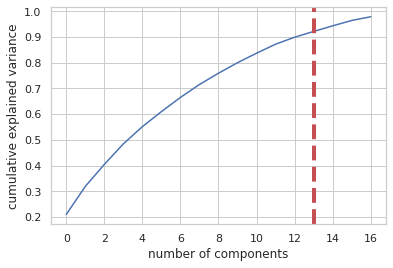

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.209663,0.209663
1,0.318750,0.109087
2,0.404303,0.085553
3,0.484256,0.079953
4,0.551202,0.066946
5,0.609651,0.058449
6,0.664843,0.055192
7,0.715189,0.050347
8,0.759032,0.043843
9,0.799975,0.040942


In [76]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=13, ymin=0, ymax=1)

display(plt.show())

evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

# np.set_printoptions(suppress=True)
# print(pca.explained_variance_ratio_.sort())
# plt.plot(pca.explained_variance_ratio_)


Random Forest Model

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

features = nutrient_disease_df.columns[0:19]
vi_x = nutrient_disease_df[features]# all the columns in our features 
vi_y = nutrient_disease_df[['% death diabetes 1']]
print(len(vi_x))
print(len(vi_y))
x_train, x_test, y_train, y_test = train_test_split(vi_x, vi_y, test_size = 0.3); # 70% training, 30% test

# how to optimize n_estimator? 
regressor = RandomForestRegressor(n_estimators=13); 

# train the model 
print(x_train.dtypes)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test); 

5847
5847
country           int64
year             object
sugar_bev        object
coffee           object
tea              object
carbs            object
protein          object
saturated_fat    object
monost_fat       object
fiber            object
calcium          object
sodium           object
iodine           object
iron             object
magnesium        object
selenium         object
vitamin_b1       object
vitamin_c        object
vitamin_e        object
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [78]:
from sklearn import metrics
feature_importances = regressor.feature_importances_
feature_names = regressor.feature_names_in_


feature_importances, feature_names = zip(*sorted(zip(feature_importances, feature_names)))
print(feature_names)
print(feature_importances)

('year', 'protein', 'tea', 'coffee', 'iron', 'magnesium', 'vitamin_b1', 'sugar_bev', 'monost_fat', 'calcium', 'sodium', 'saturated_fat', 'vitamin_c', 'iodine', 'carbs', 'country', 'vitamin_e', 'fiber', 'selenium')
(0.003569235852752135, 0.013464835957454662, 0.01765713910691339, 0.018695727304386164, 0.02130899254858939, 0.027257073424413875, 0.029005758604929394, 0.03500602470882816, 0.04505524588556194, 0.04735856200903146, 0.05429098317760503, 0.05538469224789114, 0.05998533164140584, 0.06077188669499632, 0.06151309451841585, 0.06598157453137034, 0.07766694022211815, 0.1170917682133284, 0.18893513335000836)


In [79]:
# Root mean squared error
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rms)

Root Mean Squared Error:  0.02103833416998232


Least Squares Model

In [80]:
le_df_ols = life_expectancy_nutrients_df

x = nutrient_disease_df[features]
x = StandardScaler().fit_transform(x)
y = nutrient_disease_df['% death diabetes 1'].tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.70, random_state = 5)  

#x_train = sm.add_constant(x_train).astype(np.float)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

result = sm.OLS(y_train, x_train)
ols_model = result.fit() 
print(ols_model.summary()) 
print(x_test.shape)
y_pred = ols_model.predict(x_test)

print("Parametesr: ", ols_model.params)
print("Standard errors: ", ols_model.bse)
print("R2: ", ols_model.rsquared) 
print("Predicted values: ", ols_model.predict(x_test)) 
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rms)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     17.08
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           3.43e-52
Time:                        04:15:50   Log-Likelihood:                 1395.3
No. Observations:                1754   AIC:                            -2751.
Df Residuals:                    1734   BIC:                            -2641.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1779      0.003     67.516      0.0

XGB Model

In [81]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.70, random_state = 5)  

model = XGBClassifier()
model.fit(x_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(x_test)
# evaluate predictions
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rms)

XGBClassifier(objective='multi:softprob')
Root Mean Squared Error:  0.2026537116784415


# 7 Conclusion

For all of our nutritional data, we want to see if these features correlate with different metrics including life expectancy, percent death rate of diabetes type 2 (nutritionally related), and percent death rate of diabetes type 1 (genetically inherited). To do this, we use a random forest model, ordinary least squares model (OLS), and extreme gradient boosting model (XGB). For all three, we had various results that were noteworthy.

When we ran these three models on the data for life expectancy, we noticed that all three models yielded results that indicated no significant correlation. After fitting the training data, we noticed that the test data could not accurately be predicted (according to the relatively large values in our root mean squared error). We believe that this is because overall life expectancy is not extremely correlated with nutritional intake. For example, there are other factors that contribute to this, which include health (cancer, access to healthcare, vaccines, etc.), war, and accidents.

However, for type 2 diabetes, we found that the random forest classifier had a root mean squared error of about 0.47, which is within our bounds for a correlation. Our model was able to relatively predict the test data given the training data. However, what was peculiar was that the OLS and XGB models both yielded root mean squared errors that were comparably high. We attribute this error to the fact that random forest classifiers are nonlinear in nature, which is different from OLS and XGB. Perhaps the data fits much better with nonlinear regression.

Finally, for type 1 diabetes, we noticed that the root mean squared error for both the random forest classifier and OLS were extremely low (one was almost zero with an error of 0.021). This is possibly due to our lack of data, which made it such that it performed well on the test data; as a result, we had very low error upon testing without having more contextualizing data for the classifier. As for XGB, even though it had the highest error (around 0.20), it still indicated a linear regression.

In conclusion, we find that the relationship between type 2 diabetes and nutritional intake is non linear, whereas type 1 diabetes followed a more linear trend. However, there are many limitations to our data, which we will discuss more in the next section.

# **8** Reflection

## **8.1** Challenges Faced

One of the biggest challenges we faced on this project was finding data of big enough size. We started off by finding the nutrients data, but the problem with it was the years started at 1990 and went in increments of 5. This only gave us 5 pieces of data per nutrient per country, which was not enough to model on. We decided to combat this by upsampling our data and adding more points by interpolating. Another similar problem we encountered was the disease data missing many values. It would have been harder to interpolate data in this case as the data that didn't exist was not evenly distributed across the years. We solved this problem by keeping the gender column in both the nutrient and disease dataframes. By doing this, we added another feature to analyze as well as increasing the data we have.

Another challenge was visualizing the data in a comprehensible manner since we had so many features that we were training on. What helped this was breaking visualizations down to only involve smaller subsets of data as well as color coding to make it clear what points correspond to what features. 

## **8.2** Moving Forward

Moving forward, we can predict the prevalence of more diseases. We can also apply what we now know about what nutrients have a greater effect on certain diseases and do data analysis on where the food these nutrients are commonly found in are located geographiclly to try and draw connections between 